## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

**ALURA CURSOS ONLINE**

**ALUNO:** ISTEFFERSON OLIVEIRA DA SILVA

## Formação Machine Learning Alura - Dados do ENEM

Na formação de Machine Learning da www.alura.com.br vamos inicialmente analisar os dados do Enem 2017. O Enem é uma prova aplicada aos alunos que completam o ensino médio, usada como porta de entrada para diversas faculdades no Brasil. A prova é composta de 9 avaliações distintas: Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática e 5 competências ligadas a prova de redação.

Duas situações podem ser interessantes:

a) uma faculdade deseja dar bolsa de estudos para os e as melhores estudantes. Para isso não deseja exigir que as pessoas façam todas as partes da prova.

b) seria possível prever a nota dos alunos e alunas se eles fizerem somente parte da prova? Seja deixando em branco propositalmente parte dela, ou exigindo somente uma correção parcial da prova de redação, como por exemplo somente um ou dois componentes ao invés de 5?

As duas perguntas são resumidas em: será possível prever quem teria as melhores notas em todas as partes, somente tendo feito parte da prova?

Para responder essa pergunta tentaremos modelar os dados de duas formas diferentes.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
import warnings
warnings.simplefilter("once")

#!pip install pandas=="0.24.0" --quiet
#!pip install seaborn=="0.9.0" --quiet
#!pip install scipy=="1.2.0" --quiet
!pip install yellowbrick
#!pip install numpy=="1.16.0" --quiet

C:\Users\DELL\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Users\DELL\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Users\DELL\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)


In [439]:
import pandas as pd
import seaborn as sns
import scipy
import yellowbrick
import numpy as np

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)
print("Usando yellowbrick %s" % yellowbrick.__version__)
print("Usando numpy %s" % np.__version__)

Usando pandas 1.3.4
Usando seaborn 0.9.0
Usando scipy 1.7.1
Usando yellowbrick 1.4
Usando numpy 1.20.3


In [440]:
# Vamos configurar o pandas para usar impressão de ponto flutuante com 3 casas decimais
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Pergunta: carregue os dados

- baixe os dados de 2017 em http://download.inep.gov.br/microdados/microdados_enem2017.zip
- salve o arquivo `DADOS/MICRODADOS_ENEM_2017.CSV` em um diretório chamado `input/MICRODADOS_ENEM_2017.CSV`
- leia esse arquivo com pandas na variável `enem`
- nem sempre um arquivo separado por vírgulas (csv) vem separado por vírgulas, use o argumento `sep=';'` para indicar que o arquivo usou `;` como separador
- nem sempre o arquivo vem com encoding UTF-8, use `encoding='iso-8859-1'` para indicar o encoding que foi utilizado no arquivo
- não carregue todas as colunas. Existem muitos dados que não utilizaremos em nosso estudo. Para isso utilize o parâmetro `usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"]`
- imprima os 5 primeiros elementos

**NOTA DO ALUNO: BAIXEI OS DADOS DE 2020, POIS OS DADOS DE 2017 NÃO ESTÃO MAIS DISPONÍVEIS NA FONTE INDICADA PELO EXERCÍCIO.**

In [441]:
# solução
enem = pd.read_csv('MICRODADOS_ENEM_2020.csv', encoding='iso-8859-1', sep=';', usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"])


In [442]:
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,604.100,661.700,595.300,711.300,120.000,120.000,120.000,120.000,100.000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,620.800,675.000,624.200,759.400,140.000,200.000,140.000,120.000,160.000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [443]:
print("%d elementos e %d colunas" % (enem.shape[0], enem.shape[1]))
if(enem.shape[0] != 6731341):
    print("ERRO! No conjunto de 2017 existem 6731341 dados")
if(enem.shape[1] != 9):
    print("ERRO! Carregue somente 9 colunas relativas as notas")

5783109 elementos e 9 colunas
ERRO! No conjunto de 2017 existem 6731341 dados


**NOTA DO ALUNO: COMO DITO ANTERIORMENTE, USANDO O DADO DE 2020.**

Número de linhas e de colunas no DataFrame analizado:

In [444]:
enem.shape

(5783109, 9)

## Pergunta: abra o arquivo `DICIONARIO/Dicionário_Microdados_Enem_2017.xls`
- explore quais são as colunas que possuem as notas das 4 avaliações e das 5 componentes analisadas em redação
- crie uma lista chamada `todas_as_notas` com o nome dessas 9 colunas

In [445]:
# solução
enem.columns


Index(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5'],
      dtype='object')

In [446]:
todas_as_notas = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'competência 1',
                  'competência 2', 'competência 3', 'competência 4', 'competência 5']

_____________________________
* NU_NOTA_CN	* Nota da prova de Ciências da Natureza
* NU_NOTA_CH	* Nota da prova de Ciências Humanas
* NU_NOTA_LC	* Nota da prova de Linguagens e Códigos
* NU_NOTA_MT	* Nota da prova de Matemática
_____________________________
* NU_NOTA_COMP1	* Nota da competência 1 - Demonstrar domínio da modalidade escrita formal da Língua Portuguesa.
* NU_NOTA_COMP2	* Nota da competência 2 - Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa.
* NU_NOTA_COMP3	* Nota da competência 3 - Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista.
* NU_NOTA_COMP4	* Nota da competência 4 - Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.
* NU_NOTA_COMP5	* Nota da competência 5 - Elaborar proposta de intervenção para o problema abordado, respeitando os direitos humanos.
_____________________________

In [447]:
enem.columns = todas_as_notas

In [448]:
enem.head()

,Ciências da Natureza,Ciências Humanas,Linguagens e Códigos,Matemática,competência 1,competência 2,competência 3,competência 4,competência 5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,604.100,661.700,595.300,711.300,120.000,120.000,120.000,120.000,100.000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,620.800,675.000,624.200,759.400,140.000,200.000,140.000,120.000,160.000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**NOTA DO ALUNO: NÃO ENTENDI SE ERA PARA SUBSTITUIR OS NOMES DAS COLUNAS OU CRIAR UMA COLUNA NOVA, ENTÃO APENAS SUBSTITUI OS NOMES DAS COLUNAS.**

## Pergunta: alguns alunos e alunas não vieram na prova e possuem valores vazios.

- Descarte todas as linhas que possuem valores inválidos
- Sobrescreva a variável `enem`
- Imprima as 5 primeiras notas de matemática (`MT`)

In [449]:
# solução
enem = enem.dropna()
enem.head()


,Ciências da Natureza,Ciências Humanas,Linguagens e Códigos,Matemática,competência 1,competência 2,competência 3,competência 4,competência 5
1,604.100,661.700,595.300,711.300,120.000,120.000,120.000,120.000,100.000
3,620.800,675.000,624.200,759.400,140.000,200.000,140.000,120.000,160.000
5,498.100,604.700,505.400,526.700,140.000,120.000,140.000,140.000,160.000
7,604.600,604.800,562.100,753.200,140.000,120.000,120.000,120.000,100.000
8,439.700,383.500,486.200,448.500,120.000,120.000,120.000,140.000,100.000


In [450]:
enem.shape

(2588681, 9)

## Pergunta: analise a nota total

- a coluna `nota_total` deve ser a soma de todas as 9 notas
- imprima as 5 primeiras notas totais
- desenhe o histograma da nota total
- descreva a `nota_total` em termos de média, mediana e desvio padrão

In [451]:
enem.columns

Index(['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos',
       'Matemática', 'competência 1', 'competência 2', 'competência 3',
       'competência 4', 'competência 5'],
      dtype='object')

In [452]:
# solução e impressão
enem['nota_total'] = enem['Ciências da Natureza'] + enem['Ciências Humanas'] + enem['Linguagens e Códigos'] + enem['Matemática'] + enem['competência 1'] + enem['competência 2'] + enem['competência 3'] + enem['competência 4'] + enem['competência 5']
enem.head()

,Ciências da Natureza,Ciências Humanas,Linguagens e Códigos,Matemática,competência 1,competência 2,competência 3,competência 4,competência 5,nota_total
1,604.100,661.700,595.300,711.300,120.000,120.000,120.000,120.000,100.000,3152.400
3,620.800,675.000,624.200,759.400,140.000,200.000,140.000,120.000,160.000,3439.400
5,498.100,604.700,505.400,526.700,140.000,120.000,140.000,140.000,160.000,2834.900
7,604.600,604.800,562.100,753.200,140.000,120.000,120.000,120.000,100.000,3124.700
8,439.700,383.500,486.200,448.500,120.000,120.000,120.000,140.000,100.000,2357.900


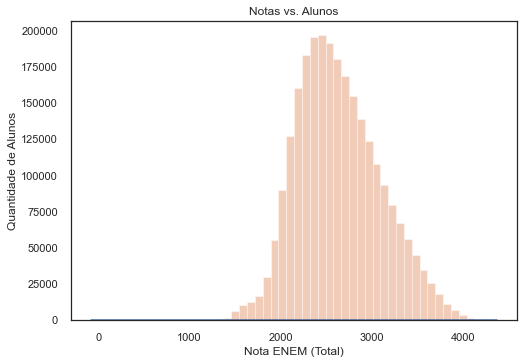

In [453]:
a = sns.distplot(enem['nota_total'])
a = sns.distplot(enem['nota_total'], kde=False)
a.set(title='Notas vs. Alunos', xlabel='Nota ENEM (Total)', ylabel='Quantidade de Alunos');

In [454]:
enem['nota_total'].describe()

count   2588681.000
mean       2632.903
std         456.907
min           0.000
25%        2297.900
50%        2584.500
75%        2934.800
max        4292.900
Name: nota_total, dtype: float64

## Pergunta: extraia 1% dos dados para explorarmos

- utilize o seed de aleatoriedade 745
- use a função `sample` para extrair 1% dos dados em uma variável chamada `enem_eda`
- plote o histograma de `enem_eda`
- descreva a `nota_total` desse sample de 1%
- a média, mediana e desvio padrão de nosso sample parecem representar o conjunto total?

Enem EDA sampling tem a distribuição


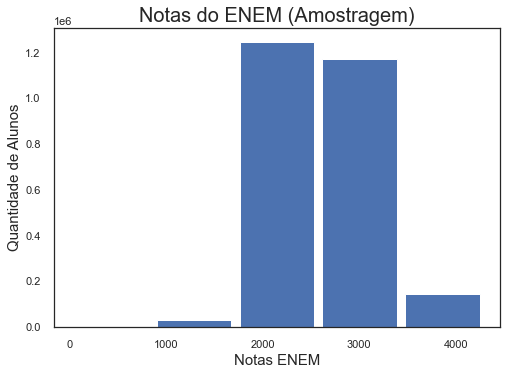

In [455]:
import matplotlib.pyplot as plt

# solução sua função de sampling

def eda_sample(enem):
    # seed
    # 1% de sample em enem_eda
    enem_eda = enem.sample(frac=0.01, random_state=745)
    print("Enem EDA sampling tem a distribuição")
    # descreva a nota_total
    # plote o histograma da nota_total e mostre com plt.show()
    plt.hist(enem['nota_total'], 5, rwidth=0.9)
    plt.title('Notas do ENEM (Amostragem)', fontsize=20)
    plt.xlabel('Notas ENEM', fontsize=15)
    plt.ylabel('Quantidade de Alunos', fontsize=15)
    plt.show()
    return enem_eda

enem_eda = eda_sample(enem)

In [456]:
enem_eda

,Ciências da Natureza,Ciências Humanas,Linguagens e Códigos,Matemática,competência 1,competência 2,competência 3,competência 4,competência 5,nota_total
2090730,578.900,407.200,496.100,606.400,120.000,80.000,80.000,120.000,0.000,2488.600
3303748,422.900,476.100,447.000,461.300,120.000,160.000,120.000,120.000,120.000,2447.300
2369848,447.300,384.900,464.000,440.700,140.000,120.000,120.000,120.000,100.000,2336.900
437439,430.300,590.100,561.000,692.600,120.000,120.000,120.000,120.000,80.000,2834.000
5447897,469.700,419.600,477.400,347.200,100.000,80.000,100.000,120.000,80.000,2193.900
...,...,...,...,...,...,...,...,...,...,...
1584130,418.400,523.300,474.000,413.100,0.000,0.000,0.000,0.000,0.000,1828.800
3512107,441.600,559.000,451.300,334.300,80.000,120.000,80.000,80.000,120.000,2266.200
42799,614.400,595.900,601.200,806.000,160.000,120.000,140.000,180.000,140.000,3357.500
5722088,583.500,536.900,588.700,607.500,120.000,120.000,140.000,140.000,120.000,2956.600


## Pergunta: analise a correlação entre as notas

- inclua a `nota_total` a `todas_as_notas`
- analise a correlação entre as variáveis contidas em todas as notas (uma tabela 10x10)

In [457]:
# solução
correlacoes = enem.corr() * 100
correlacoes

,Ciências da Natureza,Ciências Humanas,Linguagens e Códigos,Matemática,competência 1,competência 2,competência 3,competência 4,competência 5,nota_total
Ciências da Natureza,100.000,69.241,63.360,68.951,43.567,38.057,42.269,44.575,43.318,80.174
Ciências Humanas,69.241,100.000,72.341,66.139,45.934,39.388,43.746,45.058,43.828,82.465
Linguagens e Códigos,63.360,72.341,100.000,61.936,49.832,40.376,44.887,45.896,44.368,79.662
Matemática,68.951,66.139,61.936,100.000,44.477,37.955,42.228,44.977,43.223,81.909
competência 1,43.567,45.934,49.832,44.477,100.000,60.623,68.211,79.603,58.377,70.752
competência 2,38.057,39.388,40.376,37.955,60.623,100.000,89.298,67.742,74.266,69.886
competência 3,42.269,43.746,44.887,42.228,68.211,89.298,100.000,73.561,76.109,74.446
competência 4,44.575,45.058,45.896,44.977,79.603,67.742,73.561,100.000,68.837,73.116
competência 5,43.318,43.828,44.368,43.223,58.377,74.266,76.109,68.837,100.000,72.867
nota_total,80.174,82.465,79.662,81.909,70.752,69.886,74.446,73.116,72.867,100.000


In [458]:
if(correlacoes.shape != (10,10)):
    print("A matriz de correlação deveria ser entre 10 notas, totalizando 10 linhas por 10 colunas")
else:
    print("CORRELAÇÃO OK!")

CORRELAÇÃO OK!


## Pergunta: analise a correlação da nota_total

- extraia somente a linha relativa a `nota_total`
- atribua essa tabela 1x10 a variável `correlacao_com_nota_total`
- plote um gráfico de barras horizontais com o valor da correlação de cada nota com `nota_total`
- o gráfico deve estar ordenado da correlação mais baixa no topo para a correlação mais alta no fim
- use o estilo branco de gráficos do seaborn: `sns.set(style="white")`

In [459]:
# solução: cálculo da tabela de correlação com todas as notas
correlacao_com_nota_total = pd.DataFrame(data=correlacoes.loc['nota_total'])
correlacao_com_nota_total = correlacao_com_nota_total.sort_values(by=['nota_total'])
correlacao_com_nota_total

,nota_total
competência 2,69.886
competência 1,70.752
competência 5,72.867
competência 4,73.116
competência 3,74.446
Linguagens e Códigos,79.662
Ciências da Natureza,80.174
Matemática,81.909
Ciências Humanas,82.465
nota_total,100.000


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:339: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\utils.py:533: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float)


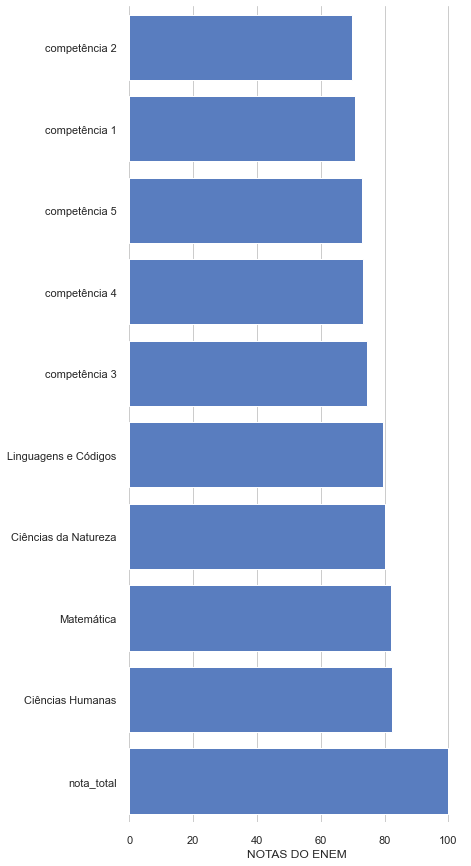

In [460]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="nota_total", y=correlacao_com_nota_total.index, data=correlacao_com_nota_total,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="nota_total", y=correlacao_com_nota_total.index, data=correlacao_com_nota_total,
            label="NOTAS ENEM", color="b");


# Add a legend and informative axis label

ax.set(ylabel="",
       xlabel="NOTAS DO ENEM")
sns.despine(left=True, bottom=True)


In [461]:
print(correlacao_com_nota_total)

                      nota_total
competência 2             69.886
competência 1             70.752
competência 5             72.867
competência 4             73.116
competência 3             74.446
Linguagens e Códigos      79.662
Ciências da Natureza      80.174
Matemática                81.909
Ciências Humanas          82.465
nota_total               100.000


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:339: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\utils.py:533: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float)


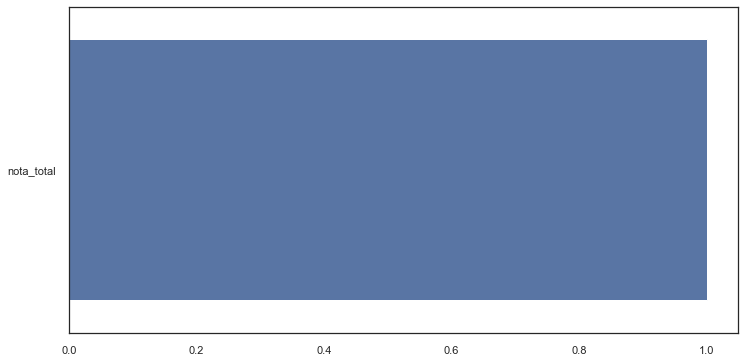

In [462]:
# solução gráfico

def plota_correlacao(dados):
    sns.set(style="white")
    plt.figure(figsize=(12, 6))
    corr = dados.corr()["nota_total"].sort_values()
    sns.barplot(y=corr.index, x=corr.values)
    
plota_correlacao(correlacao_com_nota_total)

## Pergunta: tente um primeiro modelo

- Alguns estudiosos indicam que matemática e línguas formam a base para a educação
- Com base nesse conhecimento prévio, utilize de `enem_eda` as colunas `NU_NOTA_MT` e `NU_NOTA_LC` e `nota_total`
- Crie uma variável chamada `interesse` com esses dados
- Crie uma função chamada `split` que recebe esses dados
    - Ela usa o seed para números aleatórios do numpy 42367
    - Ela faz um `train_test_split` com porcentagem de treino e teste padrão.
    - Ela imprime o tamanho dos conjuntos resultantes de treino e teste
    

In [463]:
# solução: definindo interesse e imprimindo os 5 primeiros elementos
x = pd.DataFrame()
x['Linguagens e Códigos'] = enem_eda['Linguagens e Códigos']
x['Matemática'] = enem_eda['Matemática']
x = np.array(x)
x

array([[496.1, 606.4],
       [447. , 461.3],
       [464. , 440.7],
       ...,
       [601.2, 806. ],
       [588.7, 607.5],
       [410.6, 384.3]])

In [464]:
y = pd.DataFrame()
y['nota_total'] = enem_eda['nota_total']
y = np.array(y)
y

array([[2488.6],
       [2447.3],
       [2336.9],
       ...,
       [3357.5],
       [2956.6],
       [2175.4]])

In [465]:
# Solução: a função de split

from sklearn.model_selection import train_test_split

def split(x,y):
    # seed
    # train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42367)
    print("*" * 80)
    print(f"Quebrando em treino x{x_train.shape}, y{y_train.shape}, e teste x{x_test.shape}, y{y_test.shape}")
    print(f"Usando colunas {str(x_train)}s como X")
    print(f"Desvio padrão do conjunto de testes: {y_test.std()}" )
    return x_train, x_test, y_train, y_test

In [466]:
split(x,y)

********************************************************************************
Quebrando em treino x(18120, 2), y(18120, 1), e teste x(7767, 2), y(7767, 1)
Usando colunas [[623.2 446.4]
 [558.6 612.5]
 [575.3 553.6]
 ...
 [427.4 396. ]
 [605.8 437.5]
 [479.  415.4]]s como X
Desvio padrão do conjunto de testes: 453.70657585806674


(array([[623.2, 446.4],
        [558.6, 612.5],
        [575.3, 553.6],
        ...,
        [427.4, 396. ],
        [605.8, 437.5],
        [479. , 415.4]]),
 array([[589.6, 585.1],
        [557.5, 405.3],
        [496.3, 526.5],
        ...,
        [626.8, 616.6],
        [507.9, 557. ],
        [614.7, 543.4]]),
 array([[2788.6],
        [2743.9],
        [2974.9],
        ...,
        [2138.3],
        [2657.6],
        [2310.7]]),
 array([[2748.4],
        [3126. ],
        [2568.2],
        ...,
        [3222. ],
        [2408.1],
        [2962.2]]))

In [467]:
# Código pronto

x_train, x_test, y_train, y_test = split(x,y)
if(x_train.shape[1]!=2):
    print("*" * 80)
    print("Erro! Você deveria possuir somente duas colunas em X")
    print("*" * 80)

********************************************************************************
Quebrando em treino x(18120, 2), y(18120, 1), e teste x(7767, 2), y(7767, 1)
Usando colunas [[623.2 446.4]
 [558.6 612.5]
 [575.3 553.6]
 ...
 [427.4 396. ]
 [605.8 437.5]
 [479.  415.4]]s como X
Desvio padrão do conjunto de testes: 453.70657585806674


## Pergunta: execute uma regressão linear

- defina a função `roda_regressao_linear` que recebe os 4 conjuntos de dados de treino e teste (x e y)
- treine um modelo `LinearRegression` do sklearn 
- calcule o R^2 score no conjunto de teste
- calcule o mean squared error (`mse`) e o mean absolute error (`mae`) do conjunto de teste
- imprima essas 3 métricas

In [468]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn import metrics

In [469]:
# Solução: função para executar a regressão linear

def roda_regressao_linear(x_train, x_test, y_train, y_test):
    
    # crie o modelo, treine com os dados de treino
    # calcule o r2_score com os dados de teste
    # calcule a predição e os dois tipos de erros
    
    linear_regression_model = LinearRegression()
    linear_regression_model.fit(x_train,y_train)
    
    test_pred = linear_regression_model.predict(x_test)
    acuracia_linear_regression = mean_squared_error(y_test, test_pred)
   
    print("*" * 80)
    print('R² = %s' % metrics.r2_score(y_test, test_pred).round(2))
    
    print("mse")
    print(metrics.mean_squared_error(y_test, test_pred))
    print("mae")
    print(metrics.mean_absolute_error(y_test, test_pred))
    print("RMSE")
    print(np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
    
    return test_pred

In [470]:
# código pronto

roda_regressao_linear(x_train, x_test, y_train, y_test)

********************************************************************************
R² = 0.81
mse
39532.694267213
mae
156.5770736997326
RMSE
198.82830348623156


array([[2952.50403595],
       [2487.60333618],
       [2559.46396035],
       ...,
       [3126.01515793],
       [2656.27117194],
       [2939.56903672]])

In [471]:
enem_eda['nota_total'].astype(float).describe()

count   25887.000
mean     2632.502
std       455.826
min         0.000
25%      2298.300
50%      2582.900
75%      2932.750
max      4172.300
Name: nota_total, dtype: float64

## Pergunta: analise o erro médio absoluto

- compare o erro médio absoluto com o desvio padrão dos estudantes do conjunto de testes
- o que você achou do erro encontrado com o uso desse modelo linear?

## Solução

**Como o cliente não definil uma precisão necessária ao seu negócio, estimo que 81% é uma boa precisão para começar. No entando, creio que devemos testar os dados abrangendo outras colunas, em outros modelos (não só o modelo de regressão linear), e até com um pouco mais de dados (aumentar a porcentagem das amostras), a fim de obter uma melhor precisão e ter certeza de que este é o melhor modelo a ser entregue.**

## Analisando o erro

Utilizando o módulo `yellowbrick` podemos rapidamente plotar os erros encontrados para cada estudante. No eixo X estará a `nota_total` real, enquanto no eixo Y a `nota_total` prevista pelo modelo. Quanto mais próxima da diagonal de identidade (x=y), mais correta a previsão do modelo.

Quanto menor o mean absolute error menor, mais próximo da diagonal será o modelo linear.

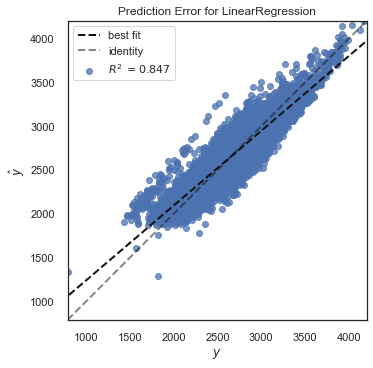

In [483]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

def visualiza_erros(x_train, x_test, y_train, y_test, model):
    
    # Create the train and test data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Instantiate the linear model and visualizer
    visualizer = PredictionError(model)

    visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(x_test, y_test)  # Evaluate the model on the test data
    visualizer.show()    
    
    

    
visualiza_erros(x_train, x_test, y_train, y_test, LinearRegression())

## Analisando o erro

Outra maneira importante de analisar o erro é ver a distribuição do resíduo, "o quão errado" nosso modelo está para os diversos valores previstos. No eixo X temos o valor previsto pelo modelo, enquanto no eixo Y o erro dessa previsão (os resíduos).

Um modelo razoável que captura a relação entre as variáveis de X e a variável dependente y comete erros de maneira "normal", isto é, seus resíduos devem seguir uma distribuição normal, mostrando não haver uma tendência para erros maiores ou menores em determinadas situações.

No gráfico a seguir você verá que a distribuição dos resíduos (gráfico da direita) se assemelham ao de uma normal.

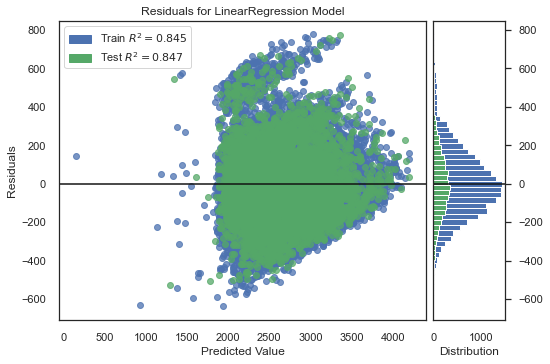

In [484]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

def analisa_erros(x_train, x_test, y_train, y_test, model):
    # Create the train and test data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Instantiate the linear model and visualizer
    visualizer = ResidualsPlot(model)

    visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(x_test, y_test)  # Evaluate the model on the test data
    visualizer.show()                 # Finalize and render the figure
    
analisa_erros(x_train, x_test, y_train, y_test, LinearRegression())

## Explorando combinações de features

Ainda nessa fase de exploração escolhemos um conjunto de features (matemática e línguas) para tentar prever a nota final. Mas sabemos da correlação das variáveis de nota com a nota total que algumas possuem uma correlação maior do que outras.

De maneira análoga ao código anterior execute o modelo linear para diversas combinações de notas que julgar pertinente.

Para cada conjunto de notas que julgar pertinente:
- escolha as colunas e crie a variável `interesse` com elas
- invoque o `split` do `interesse`
- aplique a `run_linear_regression`
- aplique a `visualiza_erros`

Dentre os modelos a testar, verifique alguns importantes:
- com todas as 9 notas, o modelo é capaz de errar pouco? afinal a nota total é uma combinação linear de todas as 9 notas
- com 8 notas, qual o erro mínimo?
- com 1, 2 ou 3 notas que você julgar que faz sentido, quais erros encontra?

In [485]:
enem_eda.columns

Index(['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos',
       'Matemática', 'competência 1', 'competência 2', 'competência 3',
       'competência 4', 'competência 5', 'nota_total'],
      dtype='object')

In [486]:
x = enem_eda[['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática']]
x = np.array(x)
x

array([[578.9, 407.2, 496.1, 606.4],
       [422.9, 476.1, 447. , 461.3],
       [447.3, 384.9, 464. , 440.7],
       ...,
       [614.4, 595.9, 601.2, 806. ],
       [583.5, 536.9, 588.7, 607.5],
       [395.3, 525.2, 410.6, 384.3]])

In [487]:
y = enem_eda['nota_total']
y = np.array(y)
y

array([2488.6, 2447.3, 2336.9, ..., 3357.5, 2956.6, 2175.4])

In [488]:
# código pronto

def regressao_completa_para(x,y):
    x_train, x_test, y_train, y_test = split(x,y)
    model = roda_regressao_linear(x_train, x_test, y_train, y_test)
    visualiza_erros(x_train, y_train, x_test, y_test, LinearRegression())
    analisa_erros(x_train, x_test, y_train, y_test,LinearRegression())

********************************************************************************
Quebrando em treino x(18120, 4), y(18120,), e teste x(7767, 4), y(7767,)
Usando colunas [[412.6 426.4 623.2 446.4]
 [549.8 463.  558.6 612.5]
 [490.4 595.6 575.3 553.6]
 ...
 [400.4 454.5 427.4 396. ]
 [578.2 596.1 605.8 437.5]
 [463.3 413.  479.  415.4]]s como X
Desvio padrão do conjunto de testes: 453.70657585806674
********************************************************************************
R² = 0.87
mse
25987.143299109466
mae
124.18497488315693
RMSE
161.2052830992504


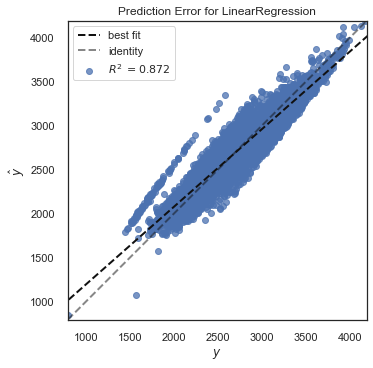

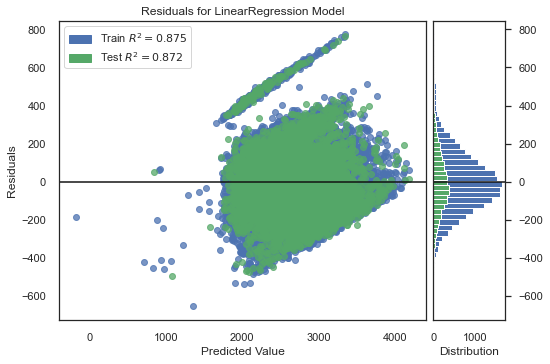

In [489]:
# solução 1: teste com todas as notas
# crie várias células com as combinações que julgar necessárias invocando sempre `regressao_completa_para`
# invoque ela com as notas que deseja analisar *E* a nota_total

regressao_completa_para(x,y)

********************************************************************************
Quebrando em treino x(18120, 9), y(18120,), e teste x(7767, 9), y(7767,)
Usando colunas [[412.6 426.4 623.2 ... 160.  200.  160. ]
 [549.8 463.  558.6 ... 120.  120.  100. ]
 [490.4 595.6 575.3 ... 120.  120.  160. ]
 ...
 [400.4 454.5 427.4 ... 120.  120.    0. ]
 [578.2 596.1 605.8 ... 100.  120.    0. ]
 [463.3 413.  479.  ... 100.  120.   80. ]]s como X
Desvio padrão do conjunto de testes: 453.70657585806674
********************************************************************************
R² = 1.0
mse
4.207530545799797e-24
mae
2.022182487265629e-12
RMSE
2.051226595430109e-12


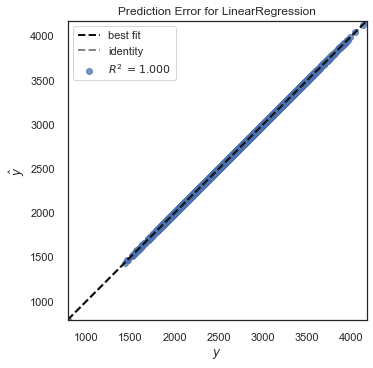

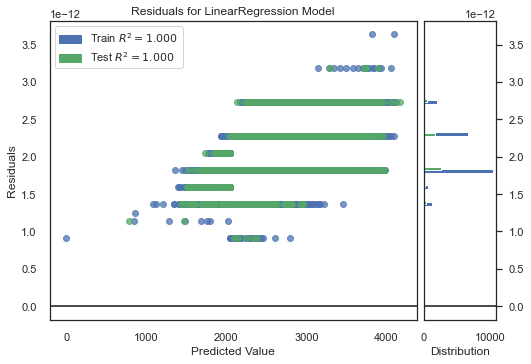

In [490]:
# solução 2: teste outra combinação

x = enem_eda[['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos',
       'Matemática', 'competência 1', 'competência 2', 'competência 3',
       'competência 4', 'competência 5']]
x = np.array(x)

y = enem_eda['nota_total']
y = np.array(y)

regressao_completa_para(x,y)

********************************************************************************
Quebrando em treino x(18120, 5), y(18120,), e teste x(7767, 5), y(7767,)
Usando colunas [[160. 200. 160. 200. 160.]
 [120. 100. 120. 120. 100.]
 [160. 200. 120. 120. 160.]
 ...
 [100. 120. 120. 120.   0.]
 [100. 120. 100. 120.   0.]
 [120. 120. 100. 120.  80.]]s como X
Desvio padrão do conjunto de testes: 453.70657585806674
********************************************************************************
R² = 0.68
mse
65724.18610920159
mae
207.5926040684226
RMSE
256.36728751773614


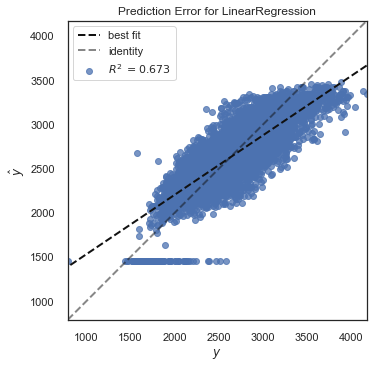

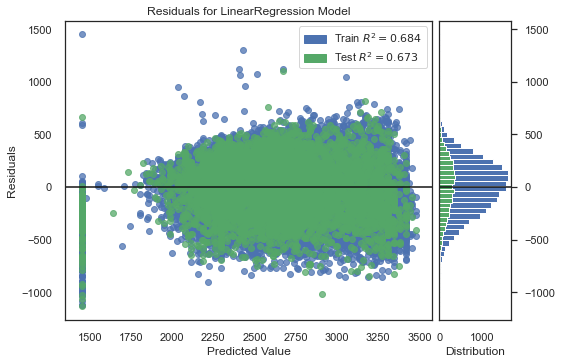

In [491]:
# solução 3: teste outra combinação

# solução 2: teste outra combinação

x = enem_eda[['competência 1', 'competência 2', 'competência 3',
       'competência 4', 'competência 5']]
x = np.array(x)

y = enem_eda['nota_total']
y = np.array(y)

regressao_completa_para(x,y)

********************************************************************************
Quebrando em treino x(18120, 7), y(18120,), e teste x(7767, 7), y(7767,)
Usando colunas [[426.4 446.4 160.  ... 160.  200.  160. ]
 [463.  612.5 120.  ... 120.  120.  100. ]
 [595.6 553.6 160.  ... 120.  120.  160. ]
 ...
 [454.5 396.  100.  ... 120.  120.    0. ]
 [596.1 437.5 100.  ... 100.  120.    0. ]
 [413.  415.4 120.  ... 100.  120.   80. ]]s como X
Desvio padrão do conjunto de testes: 453.70657585806674
********************************************************************************
R² = 0.97
mse
5609.67354623302
mae
59.3329822666938
RMSE
74.89775394651711


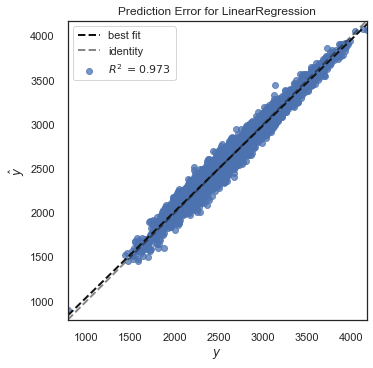

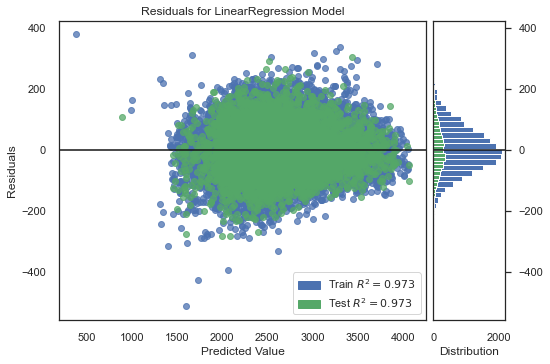

In [492]:
# solução 4: teste outra combinação

# solução 2: teste outra combinação

x = enem_eda[['Ciências Humanas','Matemática', 'competência 1', 'competência 2', 'competência 3',
       'competência 4', 'competência 5']]
x = np.array(x)

y = enem_eda['nota_total']
y = np.array(y)

regressao_completa_para(x,y)

********************************************************************************
Quebrando em treino x(18120, 3), y(18120,), e teste x(7767, 3), y(7767,)
Usando colunas [[412.6 426.4 446.4]
 [549.8 463.  612.5]
 [490.4 595.6 553.6]
 ...
 [400.4 454.5 396. ]
 [578.2 596.1 437.5]
 [463.3 413.  415.4]]s como X
Desvio padrão do conjunto de testes: 453.70657585806674
********************************************************************************
R² = 0.84
mse
32002.82422437176
mae
138.47561670943932
RMSE
178.89333197291552


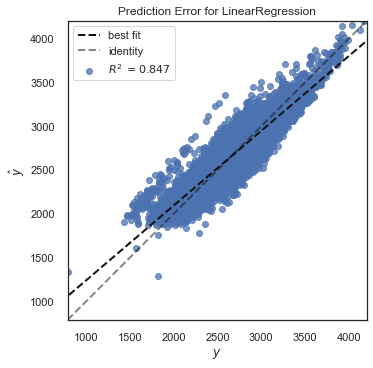

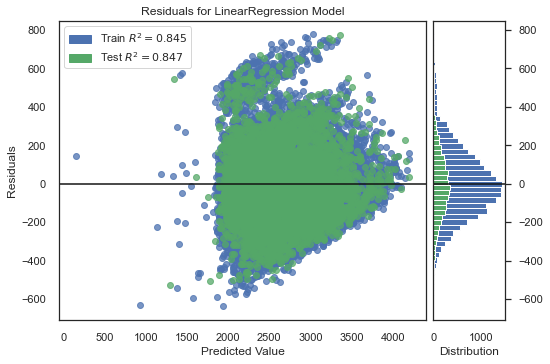

In [493]:
# solução 5: teste outra combinação

# solução 2: teste outra combinação

x = enem_eda[['Ciências da Natureza', 'Ciências Humanas',
       'Matemática']]
x = np.array(x)

y = enem_eda['nota_total']
y = np.array(y)

regressao_completa_para(x,y)

********************************************************************************
Quebrando em treino x(18120, 8), y(18120,), e teste x(7767, 8), y(7767,)
Usando colunas [[426.4 623.2 446.4 ... 160.  200.  160. ]
 [463.  558.6 612.5 ... 120.  120.  100. ]
 [595.6 575.3 553.6 ... 120.  120.  160. ]
 ...
 [454.5 427.4 396.  ... 120.  120.    0. ]
 [596.1 605.8 437.5 ... 100.  120.    0. ]
 [413.  479.  415.4 ... 100.  120.   80. ]]s como X
Desvio padrão do conjunto de testes: 453.70657585806674
********************************************************************************
R² = 0.99
mse
2545.45744607331
mae
40.26353684346711
RMSE
50.452526656980325


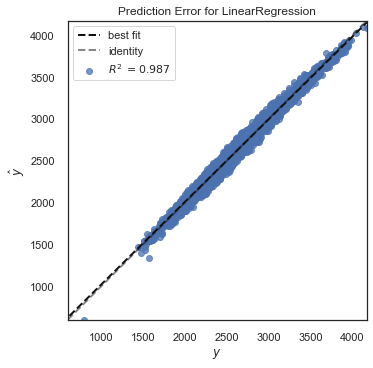

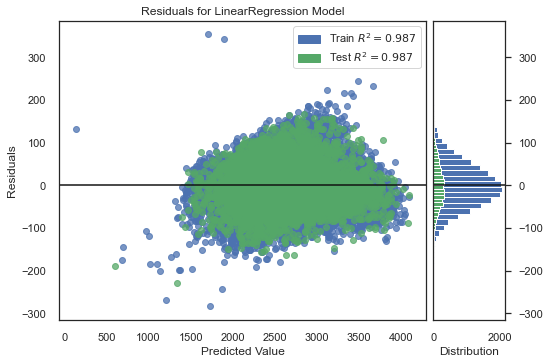

In [494]:
# solução 6: teste outra combinação

x = enem_eda[['Ciências Humanas', 'Linguagens e Códigos',
       'Matemática', 'competência 1', 'competência 2', 'competência 3',
       'competência 4', 'competência 5']]
x = np.array(x)

y = enem_eda['nota_total']
y = np.array(y)

regressao_completa_para(x,y)

**NOTA DO ALUNO: melhor modelo encontrado.**

## Pergunta: tente um modelo específico

- A prova de língua não envolve a criação de textos complexos, mas aborda a língua portuguesa
- A prova de matemática junto coma de língua apresenta um modelo razoável
- A prova de redação apresenta a oportunidade de criar textos complexos

Juntando essas três informações tente o mesmo processo de 4 passos para o modelo linear com `NU_NOTA_LC`, `NU_NOTA_COMP3` e `NU_NOTA_MT`. Analise o erro médio absoluto, o R^2 e a distribuição dos erros comparados aos modelos anteriores.

********************************************************************************
Quebrando em treino x(18120, 3), y(18120,), e teste x(7767, 3), y(7767,)
Usando colunas [[623.2 446.4 160. ]
 [558.6 612.5 120. ]
 [575.3 553.6 120. ]
 ...
 [427.4 396.  120. ]
 [605.8 437.5 100. ]
 [479.  415.4 100. ]]s como X
Desvio padrão do conjunto de testes: 453.70657585806674
********************************************************************************
R² = 0.93
mse
13793.123554654765
mae
93.98308166985318
RMSE
117.44412950273319


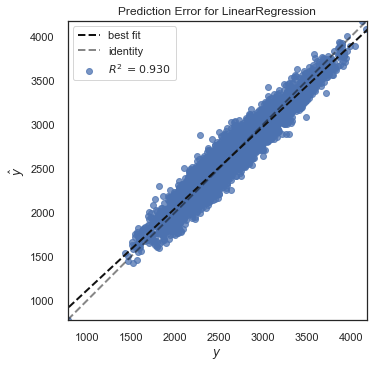

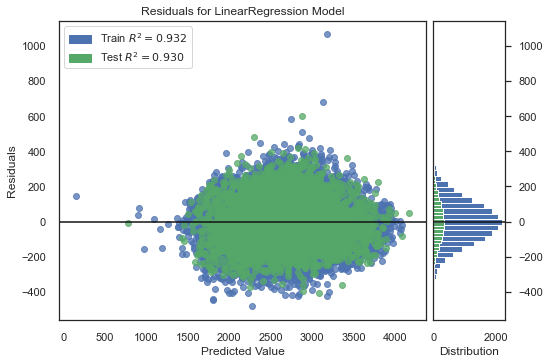

In [184]:
# solução

x = enem_eda[['Linguagens e Códigos',
       'Matemática', 'competência 3',]]
x = np.array(x)

y = enem_eda['nota_total']
y = np.array(y)

regressao_completa_para(x,y)

**NOTA DO ALUNO: Para estes dados de 2020, o modelo encontrou melhor acurácia com o conjunto de dados abaixo:**
        
        x = enem_eda[['Ciências Humanas', 'Linguagens e Códigos',
       'Matemática', 'competência 1', 'competência 2', 'competência 3',
       'competência 4', 'competência 5']]

## Escolhemos as features, qual o estimador ideal?

Vamos explorar mais ainda nosso conjunto de exploração. Vamos continuar com o conjunto de 3 notas, que seria uma possível conquista: somente com um componente de redação e 2 notas de provas seríamos capazes de prever razoavelmente a avaliação final de um aluno ou aluna.

Apesar dos gráficos anteriores indicarem que o modelo linear tem sido razoável para nossos dados, vamos testar outros estimadores. 

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_regressores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `LinearRegression`
    - `Lasso`
    - `Ridge`
    - `DecisionTreeRegressor`
    - `RandomForestRegressor`

In [185]:
# solução

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def gera_regressores(x,y):
    # gere os modelos em uma lista
    return modelos



def roda_regressao_linear(x_train, x_test, y_train, y_test):
    
    linear_regression_model = LinearRegression()
    linear_regression_model.fit(x_train,y_train)
    
    test_pred = linear_regression_model.predict(x_test)
    acuracia_linear_regression = mean_squared_error(y_test, test_pred)
    
    print("*" * 80)
    
    print('Model => LinearRegression')
    
    print('R² = %s' % metrics.r2_score(y_test, test_pred).round(2))
    
    print("mse")
    print(metrics.mean_squared_error(y_test, test_pred))
    print("mae")
    print(metrics.mean_absolute_error(y_test, test_pred))
    print("RMSE")
    print(np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
    
    return test_pred


def roda_lasso(x_train, x_test, y_train, y_test):
    
    lasso_model = Lasso()
    lasso_model.fit(x_train,y_train)
    
    test_pred = lasso_model.predict(x_test)
    acuracia_lasso = mean_squared_error(y_test, test_pred)
    
    print("*" * 80)
    
    print('Model => Lasso')
   
    print('R² = %s' % metrics.r2_score(y_test, test_pred).round(2))
    
    print("mse")
    print(metrics.mean_squared_error(y_test, test_pred))
    print("mae")
    print(metrics.mean_absolute_error(y_test, test_pred))
    print("RMSE")
    print(np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
    
    return test_pred


def roda_ridge(x_train, x_test, y_train, y_test):
    
    ridge_model = Ridge()
    ridge_model.fit(x_train,y_train)
    
    test_pred = ridge_model.predict(x_test)
    acuracia_lasso = mean_squared_error(y_test, test_pred)
    
    print("*" * 80)
    
    print('Model => Ridge')
   
    print('R² = %s' % metrics.r2_score(y_test, test_pred).round(2))
    
    print("mse")
    print(metrics.mean_squared_error(y_test, test_pred))
    print("mae")
    print(metrics.mean_absolute_error(y_test, test_pred))
    print("RMSE")
    print(np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
    
    return test_pred


def roda_decision_tree_regressor(x_train, x_test, y_train, y_test):
    
    decision_tree_regressor_model = DecisionTreeRegressor()
    decision_tree_regressor_model.fit(x_train,y_train)
    
    test_pred = decision_tree_regressor_model.predict(x_test)
    acuracia_lasso = mean_squared_error(y_test, test_pred)
    
    print("*" * 80)
    
    print('Model => DecisionTreeRegressor')
   
    print('R² = %s' % metrics.r2_score(y_test, test_pred).round(2))
    
    print("mse")
    print(metrics.mean_squared_error(y_test, test_pred))
    print("mae")
    print(metrics.mean_absolute_error(y_test, test_pred))
    print("RMSE")
    print(np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
    
    return test_pred


def roda_random_forest_regressor(x_train, x_test, y_train, y_test):
    
    random_forest_regressor_model = RandomForestRegressor()
    random_forest_regressor_model.fit(x_train,y_train)
    
    test_pred = random_forest_regressor_model.predict(x_test)
    acuracia_lasso = mean_squared_error(y_test, test_pred)
    
    print("*" * 80)
    
    print('Model => RandomForestRegressor')
   
    print('R² = %s' % metrics.r2_score(y_test, test_pred).round(2))
    
    print("mse")
    print(metrics.mean_squared_error(y_test, test_pred))
    print("mae")
    print(metrics.mean_absolute_error(y_test, test_pred))
    print("RMSE")
    print(np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
    
    return test_pred



def regressao_completa_para(x,y):
    x_train, x_test, y_train, y_test = split(x,y)
    
    linear_regression_model = roda_regressao_linear(x_train, x_test, y_train, y_test)
    visualiza_erros(x_train,y_train,x_test,y_test,LinearRegression())
    analisa_erros(x_train, x_test, y_train, y_test,LinearRegression())
    
    lasso_model = roda_lasso(x_train, x_test, y_train, y_test)
    visualiza_erros(x_train,y_train,x_test,y_test,Lasso())
    analisa_erros(x_train, x_test, y_train, y_test,Lasso())
    
    ridge_model = roda_ridge(x_train, x_test, y_train, y_test)
    visualiza_erros(x_train,y_train,x_test,y_test,Ridge())
    analisa_erros(x_train, x_test, y_train, y_test,Ridge())
    
    decision_tree_regressor_model = roda_decision_tree_regressor(x_train, x_test, y_train, y_test)
    visualiza_erros(x_train,y_train,x_test,y_test,DecisionTreeRegressor())
    analisa_erros(x_train, x_test, y_train, y_test,DecisionTreeRegressor())
    
    
    random_forest_regressor_model = roda_random_forest_regressor(x_train, x_test, y_train, y_test)
    visualiza_erros(x_train,y_train,x_test,y_test,RandomForestRegressor())
    analisa_erros(x_train, x_test, y_train, y_test,RandomForestRegressor())

********************************************************************************
Quebrando em treino x(18120, 3), y(18120,), e teste x(7767, 3), y(7767,)
Usando colunas [[623.2 446.4 160. ]
 [558.6 612.5 120. ]
 [575.3 553.6 120. ]
 ...
 [427.4 396.  120. ]
 [605.8 437.5 100. ]
 [479.  415.4 100. ]]s como X
Desvio padrão do conjunto de testes: 453.70657585806674
********************************************************************************
Model => LinearRegression
R² = 0.93
mse
13793.123554654765
mae
93.98308166985318
RMSE
117.44412950273319


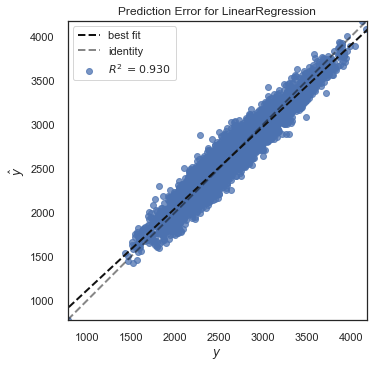

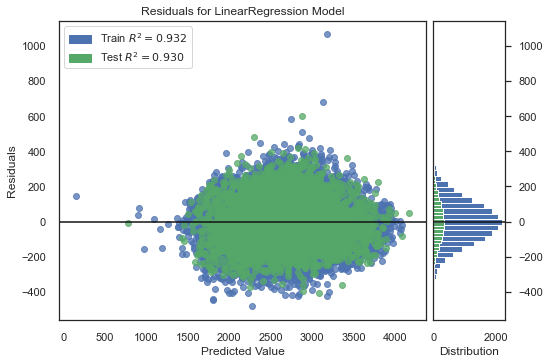

********************************************************************************
Model => Lasso
R² = 0.93
mse
13793.093210080031
mae
93.98337321913664
RMSE
117.44400031538449


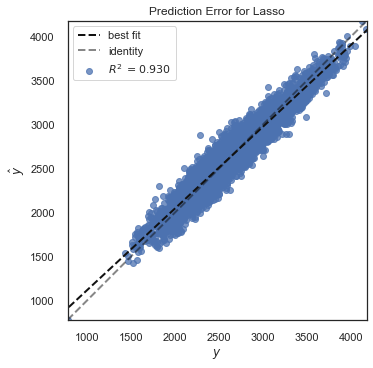

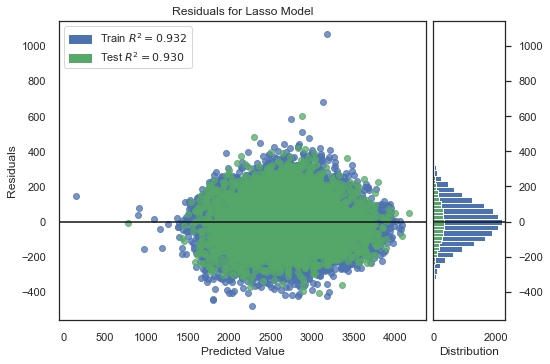

********************************************************************************
Model => Ridge
R² = 0.93
mse
13793.123544241354
mae
93.98308167825829
RMSE
117.44412945839973


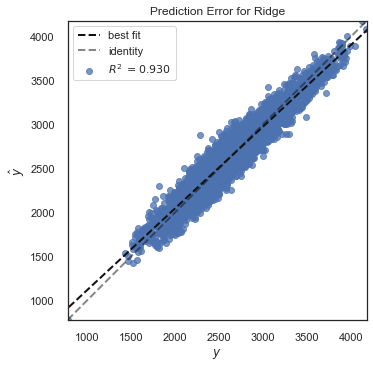

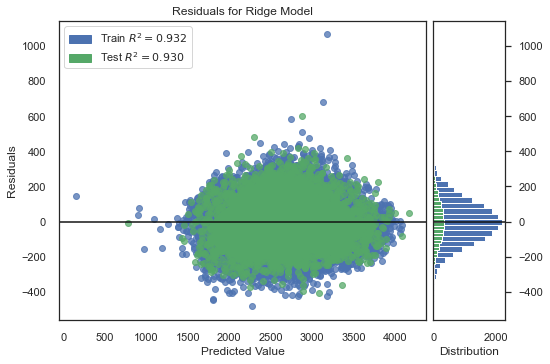

********************************************************************************
Model => DecisionTreeRegressor
R² = 0.87
mse
25951.28897225441
mae
126.95133899832626
RMSE
161.09403766823405


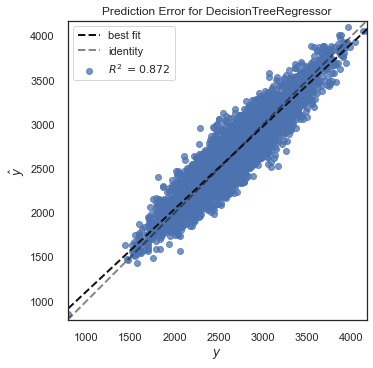

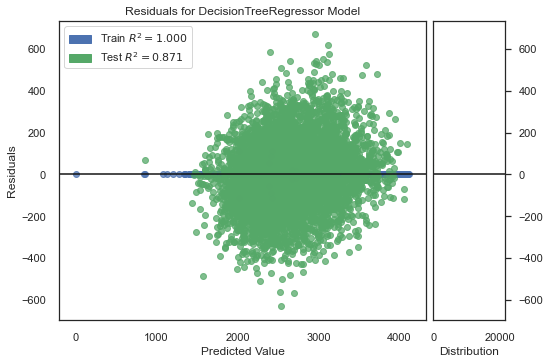

********************************************************************************
Model => RandomForestRegressor
R² = 0.93
mse
14984.264161696892
mae
96.45373538903912
RMSE
122.41022899127708


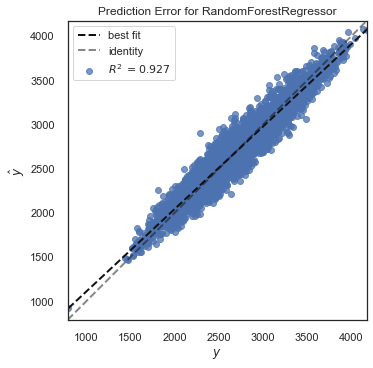

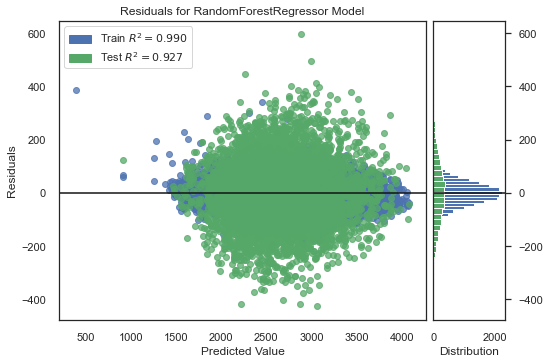

In [186]:
# teste

regressao_completa_para(x,y)

# Pergunta: crie uma função que escolhe parte dos dados

- implemente a função `escolhe_colunas`
- ela recebe o conjunto de dados e as colunas a filtrar
- escolha somente as colunas dos dados
- chame o `split` para esses dados filtrados, separando em treino e teste, x e y
- imprima o histograma de `train_y`
- plote o gráfico com `plt.show()`
- retorne `train_x, test_x, train_y, test_y` nessa ordem

In [187]:
# solução

def escolhe_dados(dados, colunas, target):
    # extraia as colunas
    # faça o split
    # plote o histograma de train_y
    
    x = dados[colunas]
    x = np.array(x)

    y = dados[target]
    y = np.array(y)
    
    x_train, x_test, y_train, y_test = split(x,y)
    
    plt.hist(dados[target], 5, rwidth=0.9)
    plt.show()
    
    return x_train, x_test, y_train, y_test


********************************************************************************
Quebrando em treino x(18120, 5), y(18120,), e teste x(7767, 5), y(7767,)
Usando colunas [[160. 200. 160. 200. 160.]
 [120. 100. 120. 120. 100.]
 [160. 200. 120. 120. 160.]
 ...
 [100. 120. 120. 120.   0.]
 [100. 120. 100. 120.   0.]
 [120. 120. 100. 120.  80.]]s como X
Desvio padrão do conjunto de testes: 453.70657585806674


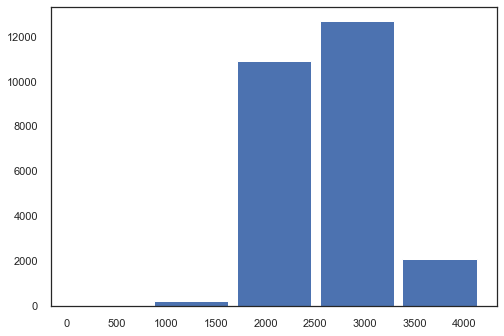

In [188]:
dados = enem_eda
target = 'nota_total'
colunas = ['competência 1', 'competência 2', 'competência 3', 'competência 4', 'competência 5']

x_train, x_test, y_train, y_test = escolhe_dados(dados, colunas, target)

## Pergunta: treine e gere as métricas

- crie uma função para treinar e gerar as métricas de uma regressão

In [189]:
# solução:

import time
def treina_e_mede_regressor(x_train, x_test, y_train, y_test):
    tic = time.time()
    roda_regressao_linear(x_train, x_test, y_train, y_test)
    tac = time.time()
    tempo_de_treino = tac - tic

    # calcule a previsão para test_x
    # calcule o mse
    # calcule o mae
    
    print(f'\nTempo de treino: {tempo_de_treino}')

    return tempo_de_treino

In [190]:
treina_e_mede_regressor(x_train, x_test, y_train, y_test)

********************************************************************************
Model => LinearRegression
R² = 0.68
mse
65724.18610920159
mae
207.5926040684226
RMSE
256.36728751773614

Tempo de treino: 0.007993936538696289


0.007993936538696289

In [191]:
enem_eda.columns

Index(['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos',
       'Matemática', 'competência 1', 'competência 2', 'competência 3',
       'competência 4', 'competência 5', 'nota_total'],
      dtype='object')

In [192]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import time


def gera_regressores(x_train, x_test, y_train, y_test, modelo):
    
    tic = time.time()
    model = modelo
    model.fit(x_train,y_train)

    test_pred = model.predict(x_test)
    acuracia_lasso = mean_squared_error(y_test, test_pred)

    print("*" * 80)

    print(f'Model => {modelo}')

    print('R² = %s' % metrics.r2_score(y_test, test_pred).round(2))

    print("mse")
    mse = metrics.mean_squared_error(y_test, test_pred)
    print(mse)
    print("mae")
    mae = metrics.mean_absolute_error(y_test, test_pred)
    print(mae)
    print("RMSE")
    print(np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
    
    tac = time.time()
    tempo_de_treino = tac - tic

    return mse, mae, tempo_de_treino

In [193]:
# código pronto

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

def analisa_regressao(dados):
    x_train, x_test, y_train, y_test = escolhe_dados(dados, ["Linguagens e Códigos", "Matemática", "competência 3"], "nota_total")
    
    resultados = []
    
    regressores = [LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),RandomForestRegressor()]
    
    for modelo in regressores:
        
        # crie um pipeline chamado pipe usando StandardScaler() e o modelo
        # use o make_pipeline ou crie um Pipeline
        
        pipe = Pipeline([('scaler', StandardScaler())])
        pipe.fit(x_train, y_train)
        
        make_pipeline(pipe)
        
        mse, mae, tempo_de_treino = gera_regressores(x_train, x_test, y_train, y_test, modelo)
        
        resultados.append([modelo, pipe, tempo_de_treino, mse, mae])
        
    resultados = pd.DataFrame(resultados, columns=["modelo", "pipe", "tempo_de_treino", "mse", "mae"])
    return x_test, y_test, resultados

********************************************************************************
Quebrando em treino x(18120, 3), y(18120,), e teste x(7767, 3), y(7767,)
Usando colunas [[623.2 446.4 160. ]
 [558.6 612.5 120. ]
 [575.3 553.6 120. ]
 ...
 [427.4 396.  120. ]
 [605.8 437.5 100. ]
 [479.  415.4 100. ]]s como X
Desvio padrão do conjunto de testes: 453.70657585806674


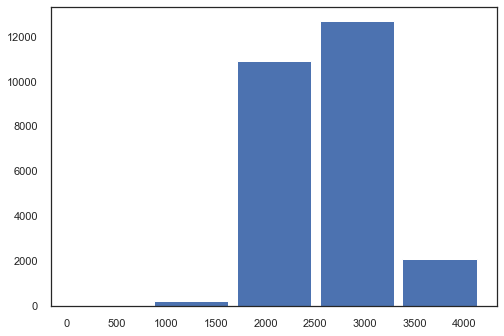

********************************************************************************
Model => LinearRegression()
R² = 0.93
mse
13793.123554654765
mae
93.98308166985318
RMSE
117.44412950273319
********************************************************************************
Model => Lasso()
R² = 0.93
mse
13793.093210080031
mae
93.98337321913664
RMSE
117.44400031538449
********************************************************************************
Model => Ridge()
R² = 0.93
mse
13793.123544241354
mae
93.98308167825829
RMSE
117.44412945839973
********************************************************************************
Model => DecisionTreeRegressor()
R² = 0.87
mse
26032.940175099782
mae
127.14062057422429
RMSE
161.3472657812948
********************************************************************************
Model => RandomForestRegressor()
R² = 0.93
mse
15028.178830460858
mae
96.5756740461783
RMSE
122.5894727554567


,modelo,mse,mae,tempo_de_treino
0,LinearRegression(),13793.124,93.983,0.007
1,Lasso(),13793.093,93.983,0.006
2,Ridge(),13793.124,93.983,0.007
3,DecisionTreeRegressor(),26032.940,127.141,0.067
4,"(DecisionTreeRegressor(max_features='auto', ra...",15028.179,96.576,3.764


In [194]:
test_x, test_y, notas = analisa_regressao(enem_eda)
notas[["modelo", "mse", "mae", "tempo_de_treino"]]

## Resultado parcial

Somente nos nossos dados de exploração fomos capazes de perceber que um modelo de regressão linear parece ser capaz de explicar a variável `nota_total` em função de três variáveis. Por mais que a rede neural possa ter se saído um pouco melhor na métrica de `mean absolute error`, o treino é longo mesmo para 5% dos dados, que ainda estamos explorando.

Como uma regressão linear simples não possui hiper-parâmetros, nosso estudo de regressão vai parar por aqui. Possuímos indícios de que podemos usar um modelo de regressão em cima de 3 notas. Mas e no caso de identificarmos alunos e alunas para bolsa? Nesse caso não precisamos saber a nota final específica, mas sim se ela está no topo das pessoas que fizeram a prova. Isto é, o aluno ou aluna está ou não está no topo X% dos alunos?

Ao invés de usarmos uma regressão, tentaremos usar uma classificação! É comum reduzir um problema de regressão em classificação através do "encaixotamento" (binning) dos valores. Por exemplo, se o topo 25% dos alunos possuem nota maior que 2600, então quem tem menos fica com 0 e quem tem mais fica com 1. Poderíamos fazer também uma classificação entre os menores 25% (0), o bolo do meio (1) e o topo 25% (2). Como nosso cliente deseja entender o topo dos alunos e alunas vamos para a abordagem de 0 e 1.

## Pergunta: As notas de treino

- dado os últimos dados de teste gerados, gere um histograma da variável y (`nota_total` que é o `test_y`)

In [195]:
# solução: histograma
x = enem_eda[['Ciências Humanas','Matemática', 'competência 1', 'competência 2', 'competência 3',
       'competência 4', 'competência 5']]
x = np.array(x)

y = enem_eda['nota_total']
y = np.array(y)

x_train, x_test, y_train, y_test = split(x,y)

TESTE = pd.DataFrame(data=x_test)
TESTE.columns = ['Ciências Humanas','Matemática', 'competência 1', 'competência 2', 'competência 3',
       'competência 4', 'competência 5']

TESTE['real_target'] = y_test
TESTE['predict_target'] = roda_regressao_linear(x_train, x_test, y_train, y_test)
TESTE.head()

********************************************************************************
Quebrando em treino x(18120, 7), y(18120,), e teste x(7767, 7), y(7767,)
Usando colunas [[426.4 446.4 160.  ... 160.  200.  160. ]
 [463.  612.5 120.  ... 120.  120.  100. ]
 [595.6 553.6 160.  ... 120.  120.  160. ]
 ...
 [454.5 396.  100.  ... 120.  120.    0. ]
 [596.1 437.5 100.  ... 100.  120.    0. ]
 [413.  415.4 120.  ... 100.  120.   80. ]]s como X
Desvio padrão do conjunto de testes: 453.70657585806674
********************************************************************************
Model => LinearRegression
R² = 0.97
mse
5609.67354623302
mae
59.3329822666938
RMSE
74.89775394651711


,Ciências Humanas,Matemática,competência 1,competência 2,competência 3,competência 4,competência 5,real_target,predict_target
0,541.900,585.100,140.000,120.000,120.000,120.000,100.000,2748.400,2796.597
1,642.400,405.300,160.000,200.000,180.000,200.000,200.000,3126.000,3087.838
2,533.200,526.500,120.000,120.000,120.000,120.000,120.000,2568.200,2695.279
3,395.600,362.900,120.000,40.000,40.000,120.000,20.000,1851.700,1955.864
4,358.500,413.200,100.000,100.000,80.000,80.000,80.000,1983.700,2061.879


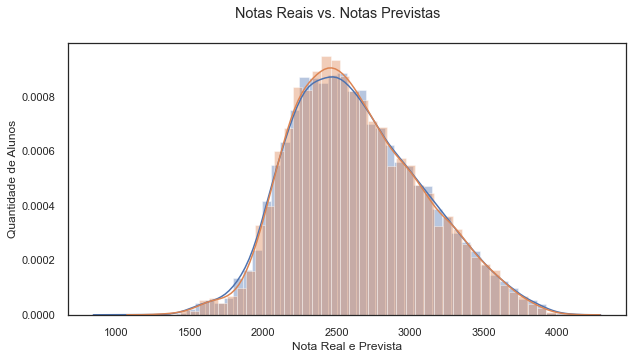

In [196]:
fig, axes = plt.subplots(1, sharex=True, figsize=(10,5))
fig.suptitle('Notas Reais vs. Notas Previstas')

axes = sns.distplot(TESTE['real_target'])
axes = sns.distplot(TESTE['predict_target'])

axes.set(xlabel='Nota Real e Prevista', ylabel='Quantidade de Alunos');


## Pergunta: criando as classes

- Crie uma função chamada `top_p` que recebe uma série de dados e um p que indica o quantil, por padrão 0.75
- A função devolve uma nova série
- O resultado são 0s para  quem está abaixo do quantil, e 1s para quem está acima

In [197]:
# solução

def top_p(serie, p = 0.75):
    # calcule o quantil p
    quant = serie.quantile(p)
    print("quantile encontrado", quant)
    
    y = serie
    
    for i in y.index:
        if y.loc[i] >= quant:
            y.loc[i] = 1
        else:
            y.loc[i] = 0
            
    # defina y como sendo uma serie de 1s e 0s. 1 se o valor da serie for maior que o quantil, 0 se menor
    return y

In [198]:
# teste do top 25%
top_25 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.75).values
if(not np.array_equal(top_25, [0,0,0,0,0,0,0,1,1,1])):
    print("Não retornou o top 25% corretamente, deveria ser ", top_25)

quantile encontrado 7.75


In [199]:
# teste do top 10%

top_10 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.90).values
if(not np.array_equal(top_10, [0,0,0,0,0,0,0,0,0,1])):
    print("Não retornou o top 10% corretamente, deveria ser", top_10)

quantile encontrado 9.1


## Visualizando classes e features

O `yellowbrick` permite visualizar o balanço de suas classes. O código a seguir vai conferir e permitir visualizar que separamos 25% dos alunos e alunas:

In [200]:
# código pronto
serie = pd.Series(y_test)
y_top25 = top_p(serie, p=0.25)
y_top25.mean()

quantile encontrado 2303.25


0.7499678125402344

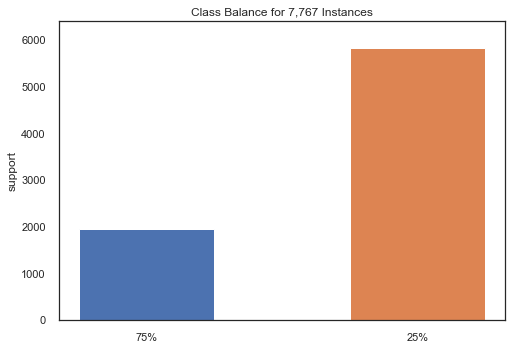

<AxesSubplot:title={'center':'Class Balance for 7,767 Instances'}, ylabel='support'>

In [201]:
# código pronto

from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=["75%", "25%"])
visualizer.fit(y_top25)
visualizer.show()

## Para saber mais: agrupando

O `yellowbrick` possui uma função para visualizar possíveis binnings. O código a seguir mostra 4 sugestões de pontos para agrupamento. Não usaremos a sugestão do yellowbrick pois no nosso caso o cliente já definiu que queria os X% do topo.

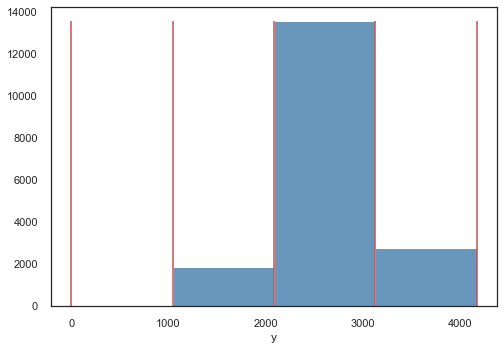

<AxesSubplot:xlabel='y'>

In [202]:
# código pronto

from yellowbrick.target import BalancedBinningReference

visualizer = BalancedBinningReference()
visualizer.fit(y_train)
visualizer.show()

## O modelo completo para classificação

Vamos passar agora pelo mesmo processo de classificação.

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_classificadores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `DummyClassifier` com a estratégia `most_frequent` (mais frequente) que será nosso baseline
    - `LogisticRegression`
    - `RidgeClassifier`
    - `DecisionTreeClassifier`
    - `RandomForestClassifier(n_estimators=10)`
    - `SVC`

In [203]:
# código pronto
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [137]:
enem_eda.head()

,Ciências da Natureza,Ciências Humanas,Linguagens e Códigos,Matemática,competência 1,competência 2,competência 3,competência 4,competência 5,nota_total
2090730,578.900,407.200,496.100,606.400,120.000,80.000,80.000,120.000,0.000,2488.600
3303748,422.900,476.100,447.000,461.300,120.000,160.000,120.000,120.000,120.000,2447.300
2369848,447.300,384.900,464.000,440.700,140.000,120.000,120.000,120.000,100.000,2336.900
437439,430.300,590.100,561.000,692.600,120.000,120.000,120.000,120.000,80.000,2834.000
5447897,469.700,419.600,477.400,347.200,100.000,80.000,100.000,120.000,80.000,2193.900


In [204]:
enem_eda['top_p'] = enem_eda['nota_total']
enem_eda['top_p'] = top_p(enem_eda['top_p'], p=0.25)
enem_eda

quantile encontrado 2298.3


,Ciências da Natureza,Ciências Humanas,Linguagens e Códigos,Matemática,competência 1,competência 2,competência 3,competência 4,competência 5,nota_total,top_p
2090730,578.900,407.200,496.100,606.400,120.000,80.000,80.000,120.000,0.000,2488.600,1.000
3303748,422.900,476.100,447.000,461.300,120.000,160.000,120.000,120.000,120.000,2447.300,1.000
2369848,447.300,384.900,464.000,440.700,140.000,120.000,120.000,120.000,100.000,2336.900,1.000
437439,430.300,590.100,561.000,692.600,120.000,120.000,120.000,120.000,80.000,2834.000,1.000
5447897,469.700,419.600,477.400,347.200,100.000,80.000,100.000,120.000,80.000,2193.900,0.000
...,...,...,...,...,...,...,...,...,...,...,...
1584130,418.400,523.300,474.000,413.100,0.000,0.000,0.000,0.000,0.000,1828.800,0.000
3512107,441.600,559.000,451.300,334.300,80.000,120.000,80.000,80.000,120.000,2266.200,0.000
42799,614.400,595.900,601.200,806.000,160.000,120.000,140.000,180.000,140.000,3357.500,1.000
5722088,583.500,536.900,588.700,607.500,120.000,120.000,140.000,140.000,120.000,2956.600,1.000


In [219]:

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


def gera_classificadores():
    # defina seus modelos
    
    x_train, x_test, y_train, y_test = escolhe_dados(dados, ["Linguagens e Códigos", "Matemática", "competência 3"], "top_p")
    
    modelos = []
    
    classificadores = [DummyClassifier(),LogisticRegression(),RidgeClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),SVC()]
    
    for modelo in classificadores:
        
        model = modelo
        model.fit(x_train,y_train)
        
        modelos.append(model)
    
    return modelos

********************************************************************************
Quebrando em treino x(18120, 3), y(18120,), e teste x(7767, 3), y(7767,)
Usando colunas [[623.2 446.4 160. ]
 [558.6 612.5 120. ]
 [575.3 553.6 120. ]
 ...
 [427.4 396.  120. ]
 [605.8 437.5 100. ]
 [479.  415.4 100. ]]s como X
Desvio padrão do conjunto de testes: 0.4304746970174886


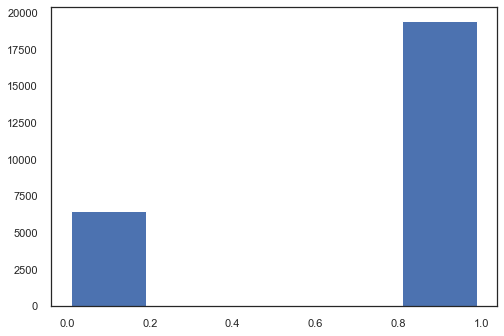

In [220]:
# código pronto

if(len(gera_classificadores()) != 6):
    print("Erro!!! São 6 classificadores que queremos testar!")

## Pergunta: defina uma nova função de split, agora baseada nas classes

- crie a função `split_classe` que recebe os `dados`
- use `42367` como seed para o `numpy`
- X são todas as colunas exceto a coluna `top_p`
- y é a coluna `top_p`
- chame `train_test_split`
    - stratify é a coluna y
- imprima os tamanhos dos conjuntos
- imprima o número de colunas de X
- imprima a média de test_y
- retorne os conjuntos de treino e teste

In [229]:
from sklearn.model_selection import train_test_split

def split_classificacao(dados, colunas, target):
    # faça o seed do numpy
    # defina X como todas as colunas de `dados` exceto top_p
    # defina y como somente a coluna top_p
    # quebre em treino e teste, usando estratificação baseada em y
    
    x = dados[colunas]
    x = np.array(x)

    y = dados[target]
    y = np.array(y)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42367)
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", x_train.shape, y_train.shape,x_test.shape, y_test.shape)
    print(f"Usando colunas {colunas}s como X")
    print("Média do conjunto de testes", y_test.mean())
    return x_train, x_test, y_train, y_test

In [247]:
split_classificacao(enem_eda, ["Linguagens e Códigos", "Matemática", "competência 3"], "top_p")

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (18120, 3) (18120,) (7767, 3) (7767,)
Usando colunas ['Linguagens e Códigos', 'Matemática', 'competência 3']s como X
Média do conjunto de testes 0.7543453070683661


(array([[623.2, 446.4, 160. ],
        [558.6, 612.5, 120. ],
        [575.3, 553.6, 120. ],
        ...,
        [427.4, 396. , 120. ],
        [605.8, 437.5, 100. ],
        [479. , 415.4, 100. ]]),
 array([[589.6, 585.1, 120. ],
        [557.5, 405.3, 180. ],
        [496.3, 526.5, 120. ],
        ...,
        [626.8, 616.6, 160. ],
        [507.9, 557. , 100. ],
        [614.7, 543.4, 120. ]]),
 array([1., 1., 1., ..., 0., 1., 1.]),
 array([1., 1., 1., ..., 1., 1., 1.]))

## Testando sua função de split

In [230]:
# código pronto: teste

x_train, x_test, y_train, y_test = split_classificacao(enem_eda, ["Linguagens e Códigos", "Matemática", "competência 3"], "top_p")

if(x_train.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(y_test.mean() <= 0.24 or y_test.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (18120, 3) (18120,) (7767, 3) (7767,)
Usando colunas ['Linguagens e Códigos', 'Matemática', 'competência 3']s como X
Média do conjunto de testes 0.7543453070683661
********************************************************************************
Erro! Você deveria capturar somente o top 25% e usar estratificação no split
********************************************************************************


## Pergunta: implemente o treino e o teste do classificador

In [262]:
# solução:
# solução:

from sklearn.metrics import accuracy_score

import time
def treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y):
    tic = time.time()
    # treine o pipeline
    pipe.fit(train_x, train_y)
    tac = time.time()
    tempo_de_treino = tac - tic
    # calcule a accuracy_score
    test_pred = pipe.predict(test_x)
    accuracy = accuracy_score(test_y, test_pred)

    print("Resultado", nome, accuracy)

    return accuracy, tempo_de_treino

## Pergunta implemente a função de escolha de dados e split para classificação

In [263]:
# solução:

def escolhe_dados_para_classificacao(dados, colunas, p):
    
    train_x, test_x, train_y, test_y = split_classificacao(enem_eda, ["Linguagens e Códigos", "Matemática", "competência 3"], "top_p")
    plt.hist(train_y, 5, rwidth=0.9)
    plt.show()
    return train_x, test_x, train_y, test_y

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (18120, 3) (18120,) (7767, 3) (7767,)
Usando colunas ['Linguagens e Códigos', 'Matemática', 'competência 3']s como X
Média do conjunto de testes 0.7543453070683661


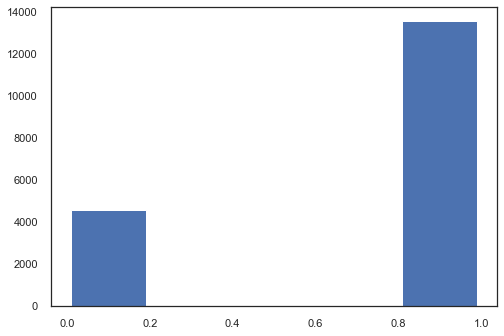

********************************************************************************
Erro! Você deveria capturar somente o top 25% e usar estratificação no split
********************************************************************************


In [264]:
# testando a escolha

x_train, x_test, y_train, y_test = escolhe_dados_para_classificacao(enem_eda, ["Linguagens e Códigos", "Matemática", "competência 3"], "top_p")

if(x_train.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(y_test.mean() <= 0.24 or y_test.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

In [265]:
# código pronto

def analisa_classificacao(dados, p = 0.75):
    
    colunas = ["nota_total", "Linguagens e Códigos", "Matemática", "competência 3"]
    train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(dados, colunas, p=p)
    
    resultados = []
    for modelo in gera_classificadores():
        nome = type(modelo).__name__
        pipe = make_pipeline(StandardScaler(), modelo)
        accuracy_score, tempo_de_treino = treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y)
        resultados.append([nome, modelo, pipe, tempo_de_treino, accuracy_score])
        
    resultados = pd.DataFrame(resultados, columns=["tipo", "modelo", "pipe", "tempo_de_treino", "accuracy_score"])
    return test_x, test_y, resultados.set_index("tipo")


## Pergunta: rode a analisa_classificacao

- rode 6 vezes, cada uma em uma célular diferente, vamos ver o quão bem os modelos tentam prever o top X%
- queremos o top 25% (quantil/p=0.75), top 20%, top 10%, top 5% e top 1%
- queremos também rodar para as últimas 25% pessoas, isto é p=0.25

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (18120, 3) (18120,) (7767, 3) (7767,)
Usando colunas ['Linguagens e Códigos', 'Matemática', 'competência 3']s como X
Média do conjunto de testes 0.7543453070683661


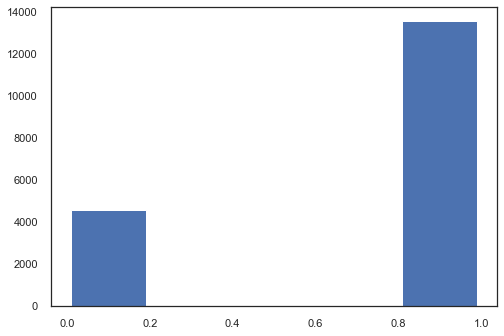

********************************************************************************
Quebrando em treino x(18120, 3), y(18120,), e teste x(7767, 3), y(7767,)
Usando colunas [[623.2 446.4 160. ]
 [558.6 612.5 120. ]
 [575.3 553.6 120. ]
 ...
 [427.4 396.  120. ]
 [605.8 437.5 100. ]
 [479.  415.4 100. ]]s como X
Desvio padrão do conjunto de testes: 0.4304746970174886


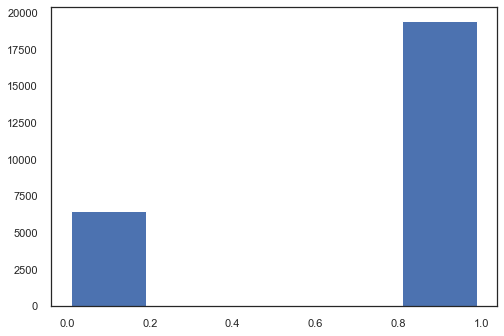

Resultado DummyClassifier 0.7543453070683661
Resultado LogisticRegression 0.9227500965623793
Resultado RidgeClassifier 0.9089738637826703
Resultado DecisionTreeClassifier 0.8964851293935883
Resultado RandomForestClassifier 0.9201750997811253
Resultado SVC 0.9251963435045706


,modelo,pipe,tempo_de_treino,accuracy_score
tipo,,,,
DummyClassifier,DummyClassifier(),"(StandardScaler(), DummyClassifier())",0.000,0.754
LogisticRegression,LogisticRegression(),"(StandardScaler(), LogisticRegression())",0.030,0.923
RidgeClassifier,RidgeClassifier(),"(StandardScaler(), RidgeClassifier())",0.010,0.909
DecisionTreeClassifier,DecisionTreeClassifier(),"(StandardScaler(), DecisionTreeClassifier())",0.040,0.896
RandomForestClassifier,"(DecisionTreeClassifier(max_features='auto', r...","(StandardScaler(), (DecisionTreeClassifier(max...",1.307,0.920
SVC,SVC(),"(StandardScaler(), SVC())",4.049,0.925


In [304]:
# solução top 25%
a, b, notas = analisa_classificacao(dados, p = 0.25)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (18120, 3) (18120,) (7767, 3) (7767,)
Usando colunas ['Linguagens e Códigos', 'Matemática', 'competência 3']s como X
Média do conjunto de testes 0.7543453070683661


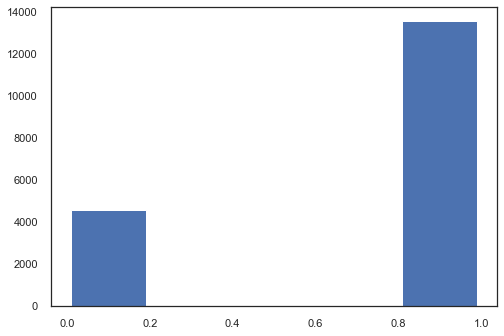

********************************************************************************
Quebrando em treino x(18120, 3), y(18120,), e teste x(7767, 3), y(7767,)
Usando colunas [[623.2 446.4 160. ]
 [558.6 612.5 120. ]
 [575.3 553.6 120. ]
 ...
 [427.4 396.  120. ]
 [605.8 437.5 100. ]
 [479.  415.4 100. ]]s como X
Desvio padrão do conjunto de testes: 0.4304746970174886


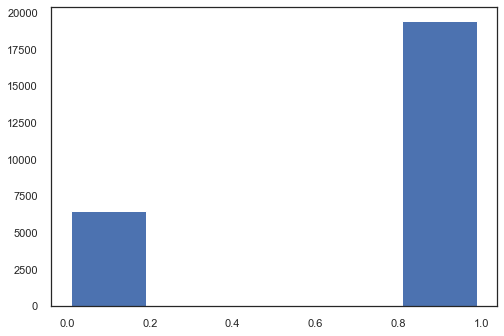

Resultado DummyClassifier 0.7543453070683661
Resultado LogisticRegression 0.9227500965623793
Resultado RidgeClassifier 0.9089738637826703
Resultado DecisionTreeClassifier 0.8981588773014034
Resultado RandomForestClassifier 0.9188876013904983
Resultado SVC 0.9251963435045706


,modelo,pipe,tempo_de_treino,accuracy_score
tipo,,,,
DummyClassifier,DummyClassifier(),"(StandardScaler(), DummyClassifier())",0.010,0.754
LogisticRegression,LogisticRegression(),"(StandardScaler(), LogisticRegression())",0.040,0.923
RidgeClassifier,RidgeClassifier(),"(StandardScaler(), RidgeClassifier())",0.011,0.909
DecisionTreeClassifier,DecisionTreeClassifier(),"(StandardScaler(), DecisionTreeClassifier())",0.035,0.898
RandomForestClassifier,"(DecisionTreeClassifier(max_features='auto', r...","(StandardScaler(), (DecisionTreeClassifier(max...",1.335,0.919
SVC,SVC(),"(StandardScaler(), SVC())",4.113,0.925


In [305]:
# solução top 20%
a, b, notas = analisa_classificacao(dados, p = 0.20)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (18120, 3) (18120,) (7767, 3) (7767,)
Usando colunas ['Linguagens e Códigos', 'Matemática', 'competência 3']s como X
Média do conjunto de testes 0.7543453070683661


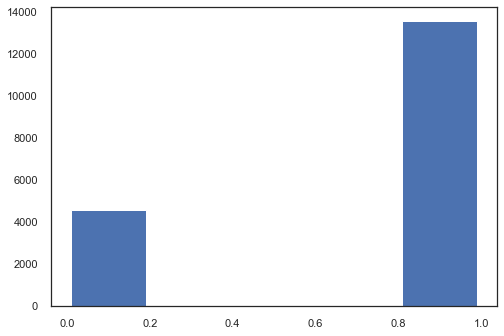

********************************************************************************
Quebrando em treino x(18120, 3), y(18120,), e teste x(7767, 3), y(7767,)
Usando colunas [[623.2 446.4 160. ]
 [558.6 612.5 120. ]
 [575.3 553.6 120. ]
 ...
 [427.4 396.  120. ]
 [605.8 437.5 100. ]
 [479.  415.4 100. ]]s como X
Desvio padrão do conjunto de testes: 0.4304746970174886


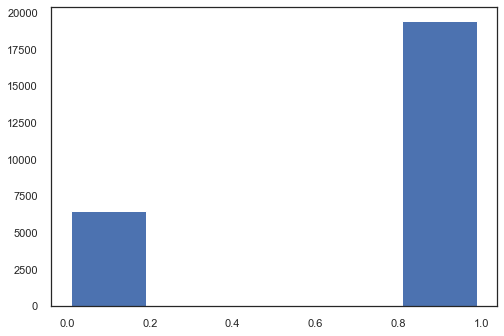

Resultado DummyClassifier 0.7543453070683661
Resultado LogisticRegression 0.9227500965623793
Resultado RidgeClassifier 0.9089738637826703
Resultado DecisionTreeClassifier 0.8958413801982748
Resultado RandomForestClassifier 0.9195313505858118
Resultado SVC 0.9251963435045706


,modelo,pipe,tempo_de_treino,accuracy_score
tipo,,,,
DummyClassifier,DummyClassifier(),"(StandardScaler(), DummyClassifier())",0.004,0.754
LogisticRegression,LogisticRegression(),"(StandardScaler(), LogisticRegression())",0.043,0.923
RidgeClassifier,RidgeClassifier(),"(StandardScaler(), RidgeClassifier())",0.013,0.909
DecisionTreeClassifier,DecisionTreeClassifier(),"(StandardScaler(), DecisionTreeClassifier())",0.052,0.896
RandomForestClassifier,"(DecisionTreeClassifier(max_features='auto', r...","(StandardScaler(), (DecisionTreeClassifier(max...",1.300,0.920
SVC,SVC(),"(StandardScaler(), SVC())",4.155,0.925


In [310]:
# solução top 10%
a, b, notas = analisa_classificacao(dados, p = 0.10)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (18120, 3) (18120,) (7767, 3) (7767,)
Usando colunas ['Linguagens e Códigos', 'Matemática', 'competência 3']s como X
Média do conjunto de testes 0.7543453070683661


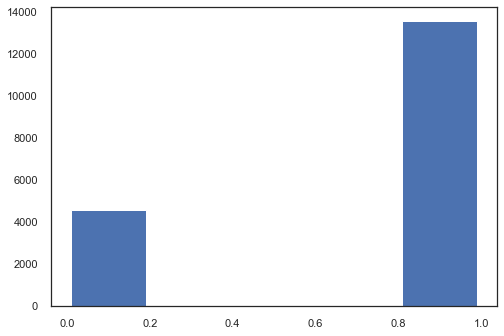

********************************************************************************
Quebrando em treino x(18120, 3), y(18120,), e teste x(7767, 3), y(7767,)
Usando colunas [[623.2 446.4 160. ]
 [558.6 612.5 120. ]
 [575.3 553.6 120. ]
 ...
 [427.4 396.  120. ]
 [605.8 437.5 100. ]
 [479.  415.4 100. ]]s como X
Desvio padrão do conjunto de testes: 0.4304746970174886


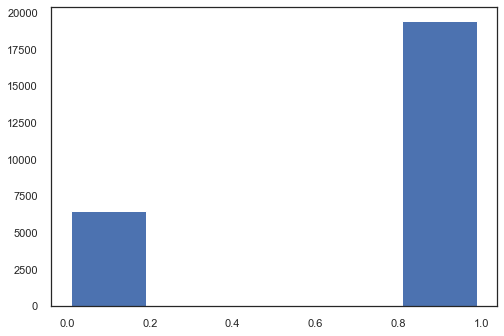

Resultado DummyClassifier 0.7543453070683661
Resultado LogisticRegression 0.9227500965623793
Resultado RidgeClassifier 0.9089738637826703
Resultado DecisionTreeClassifier 0.8963563795545255
Resultado RandomForestClassifier 0.9190163512295609
Resultado SVC 0.9251963435045706


,modelo,pipe,tempo_de_treino,accuracy_score
tipo,,,,
DummyClassifier,DummyClassifier(),"(StandardScaler(), DummyClassifier())",0.004,0.754
LogisticRegression,LogisticRegression(),"(StandardScaler(), LogisticRegression())",0.031,0.923
RidgeClassifier,RidgeClassifier(),"(StandardScaler(), RidgeClassifier())",0.011,0.909
DecisionTreeClassifier,DecisionTreeClassifier(),"(StandardScaler(), DecisionTreeClassifier())",0.046,0.896
RandomForestClassifier,"(DecisionTreeClassifier(max_features='auto', r...","(StandardScaler(), (DecisionTreeClassifier(max...",1.322,0.919
SVC,SVC(),"(StandardScaler(), SVC())",4.086,0.925


In [306]:
# solução top 5%
a, b, notas = analisa_classificacao(dados, p = 0.05)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (18120, 3) (18120,) (7767, 3) (7767,)
Usando colunas ['Linguagens e Códigos', 'Matemática', 'competência 3']s como X
Média do conjunto de testes 0.7543453070683661


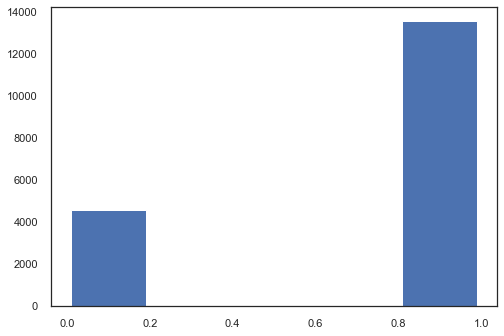

********************************************************************************
Quebrando em treino x(18120, 3), y(18120,), e teste x(7767, 3), y(7767,)
Usando colunas [[623.2 446.4 160. ]
 [558.6 612.5 120. ]
 [575.3 553.6 120. ]
 ...
 [427.4 396.  120. ]
 [605.8 437.5 100. ]
 [479.  415.4 100. ]]s como X
Desvio padrão do conjunto de testes: 0.4304746970174886


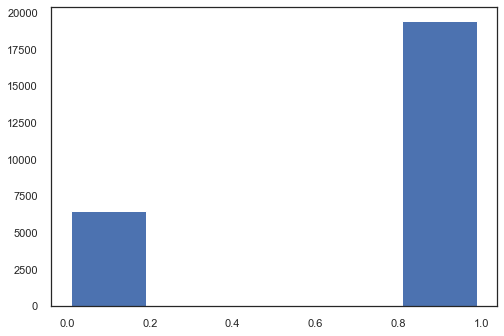

Resultado DummyClassifier 0.7543453070683661
Resultado LogisticRegression 0.9227500965623793
Resultado RidgeClassifier 0.9089738637826703
Resultado DecisionTreeClassifier 0.8972576284279644
Resultado RandomForestClassifier 0.9201750997811253
Resultado SVC 0.9251963435045706


,modelo,pipe,tempo_de_treino,accuracy_score
tipo,,,,
DummyClassifier,DummyClassifier(),"(StandardScaler(), DummyClassifier())",0.000,0.754
LogisticRegression,LogisticRegression(),"(StandardScaler(), LogisticRegression())",0.040,0.923
RidgeClassifier,RidgeClassifier(),"(StandardScaler(), RidgeClassifier())",0.010,0.909
DecisionTreeClassifier,DecisionTreeClassifier(),"(StandardScaler(), DecisionTreeClassifier())",0.042,0.897
RandomForestClassifier,"(DecisionTreeClassifier(max_features='auto', r...","(StandardScaler(), (DecisionTreeClassifier(max...",1.324,0.920
SVC,SVC(),"(StandardScaler(), SVC())",4.113,0.925


In [309]:
# solução top 1%
a, b, notas = analisa_classificacao(dados, p = 0.01)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (18120, 3) (18120,) (7767, 3) (7767,)
Usando colunas ['Linguagens e Códigos', 'Matemática', 'competência 3']s como X
Média do conjunto de testes 0.7543453070683661


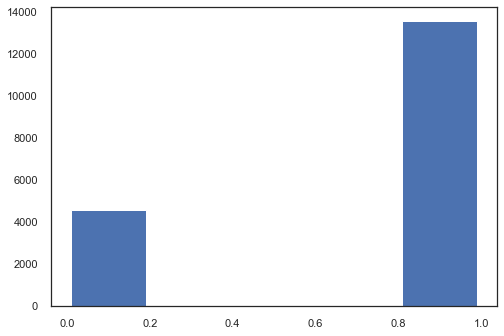

********************************************************************************
Quebrando em treino x(18120, 3), y(18120,), e teste x(7767, 3), y(7767,)
Usando colunas [[623.2 446.4 160. ]
 [558.6 612.5 120. ]
 [575.3 553.6 120. ]
 ...
 [427.4 396.  120. ]
 [605.8 437.5 100. ]
 [479.  415.4 100. ]]s como X
Desvio padrão do conjunto de testes: 0.4304746970174886


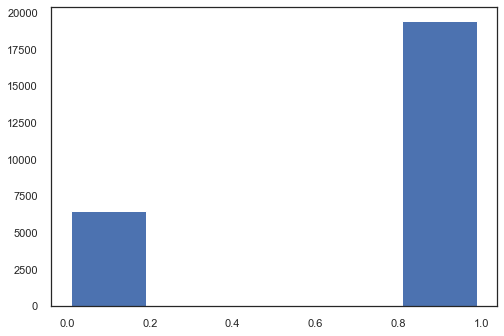

Resultado DummyClassifier 0.7543453070683661
Resultado LogisticRegression 0.9227500965623793
Resultado RidgeClassifier 0.9089738637826703
Resultado DecisionTreeClassifier 0.8973863782670272
Resultado RandomForestClassifier 0.9200463499420626
Resultado SVC 0.9251963435045706


,modelo,pipe,tempo_de_treino,accuracy_score
tipo,,,,
DummyClassifier,DummyClassifier(),"(StandardScaler(), DummyClassifier())",0.005,0.754
LogisticRegression,LogisticRegression(),"(StandardScaler(), LogisticRegression())",0.039,0.923
RidgeClassifier,RidgeClassifier(),"(StandardScaler(), RidgeClassifier())",0.015,0.909
DecisionTreeClassifier,DecisionTreeClassifier(),"(StandardScaler(), DecisionTreeClassifier())",0.034,0.897
RandomForestClassifier,"(DecisionTreeClassifier(max_features='auto', r...","(StandardScaler(), (DecisionTreeClassifier(max...",1.384,0.920
SVC,SVC(),"(StandardScaler(), SVC())",4.136,0.925


In [311]:
# solução bottom 25%
a, b, notas = analisa_classificacao(dados, p = 0.25)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas

## Escolhendo o top 25%

Dado o cenário de topo 25%, o DummyClassifier acertou 75% das vezes, errou 25%. O modelo que estamos criando conseguiria atingir no máximo esses 25% a mais de acerto (máximo de 100%). Se conferirmos que o modelo logístico acertou 93.7%, isso significa que 93.7% - 75% = 18.7%. Portanto do ganho máximo de 25% o modelo está acertando 18.7%, um total de 74.8% de ganho do potencial máximo de um modelo.

Por mais que pareça pouco, esses 18.7% representam quase 3/4 de todo o ganho potencial que um modelo pode ter.

Você pode fazer a mesma conta paa os outros ps, lembrando que essa não é uma métrica comum de se analisar. Na prática queremos entender agora como foi que o modelo errou. Ele errou os casos do bottom 75% e do top 25% igualmente? Ou errou mais em um dos dois casos?

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (18120, 3) (18120,) (7767, 3) (7767,)
Usando colunas ['Linguagens e Códigos', 'Matemática', 'competência 3']s como X
Média do conjunto de testes 0.7543453070683661


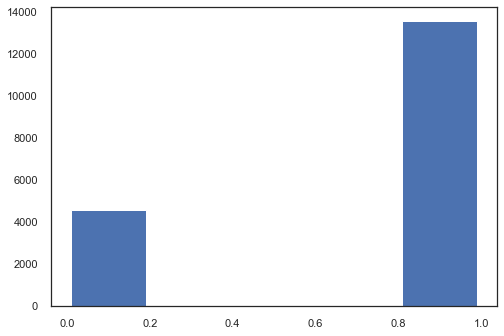

********************************************************************************
Quebrando em treino x(18120, 3), y(18120,), e teste x(7767, 3), y(7767,)
Usando colunas [[623.2 446.4 160. ]
 [558.6 612.5 120. ]
 [575.3 553.6 120. ]
 ...
 [427.4 396.  120. ]
 [605.8 437.5 100. ]
 [479.  415.4 100. ]]s como X
Desvio padrão do conjunto de testes: 0.4304746970174886


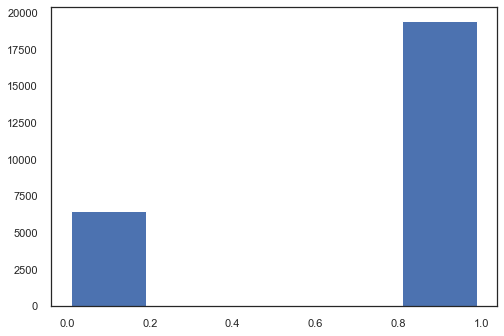

Resultado DummyClassifier 0.7543453070683661
Resultado LogisticRegression 0.9227500965623793
Resultado RidgeClassifier 0.9089738637826703
Resultado DecisionTreeClassifier 0.8977726277842153
Resultado RandomForestClassifier 0.9200463499420626
Resultado SVC 0.9251963435045706


,modelo,pipe,tempo_de_treino,accuracy_score
tipo,,,,
DummyClassifier,DummyClassifier(),"(StandardScaler(), DummyClassifier())",0.010,0.754
LogisticRegression,LogisticRegression(),"(StandardScaler(), LogisticRegression())",0.030,0.923
RidgeClassifier,RidgeClassifier(),"(StandardScaler(), RidgeClassifier())",0.010,0.909
DecisionTreeClassifier,DecisionTreeClassifier(),"(StandardScaler(), DecisionTreeClassifier())",0.053,0.898
RandomForestClassifier,"(DecisionTreeClassifier(max_features='auto', r...","(StandardScaler(), (DecisionTreeClassifier(max...",1.327,0.920
SVC,SVC(),"(StandardScaler(), SVC())",4.195,0.925


In [308]:
# código pronto: rodando para top 25%
a, b, notas = analisa_classificacao(dados, p = 0.25)
# rode a analisa_classificacao e armazene test_x, test_y e notas de 25%
notas

## Plotando a matriz de confusão

Vamos ver quantas vezes os dois principais modelos (Regressão logística e SVC) acertam e erram. Para isso plotaremos a matriz de confusão (código pronto).

In [297]:
# código pronto

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm):
    
    classes = ['Não topo 25%','Topo 25%']

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de confusão normalizada')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f') + '%',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe real')
    plt.xlabel('Classe predita')
    plt.tight_layout()
    plt.show()

def print_confusion_for(test_x, test_y, model):
    pred_y = model.predict(test_x)
    print("Acurácia do modelo em teste", model.score(test_x, test_y))
    cnf_matrix = confusion_matrix(test_y, pred_y)

    plot_confusion_matrix(cnf_matrix)


In [312]:
notas

,modelo,pipe,tempo_de_treino,accuracy_score
tipo,,,,
DummyClassifier,DummyClassifier(),"(StandardScaler(), DummyClassifier())",0.005,0.754
LogisticRegression,LogisticRegression(),"(StandardScaler(), LogisticRegression())",0.039,0.923
RidgeClassifier,RidgeClassifier(),"(StandardScaler(), RidgeClassifier())",0.015,0.909
DecisionTreeClassifier,DecisionTreeClassifier(),"(StandardScaler(), DecisionTreeClassifier())",0.034,0.897
RandomForestClassifier,"(DecisionTreeClassifier(max_features='auto', r...","(StandardScaler(), (DecisionTreeClassifier(max...",1.384,0.920
SVC,SVC(),"(StandardScaler(), SVC())",4.136,0.925


Acurácia do modelo em teste 0.9227500965623793


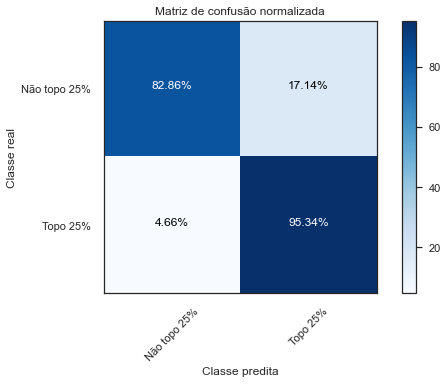

In [313]:
# código pronto

print_confusion_for(x_test, y_test, notas.loc['LogisticRegression']['pipe'])

Acurácia do modelo em teste 0.9251963435045706


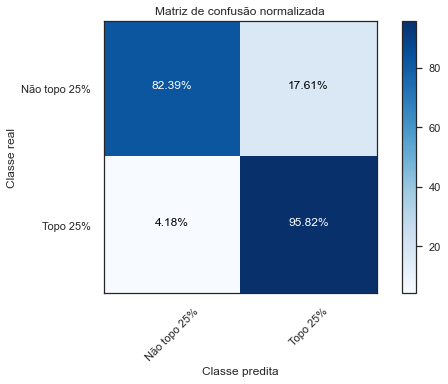

In [316]:
# código pronto
print_confusion_for(x_test, y_test, notas.loc['SVC']['pipe'])

Acurácia do modelo em teste 0.7543453070683661


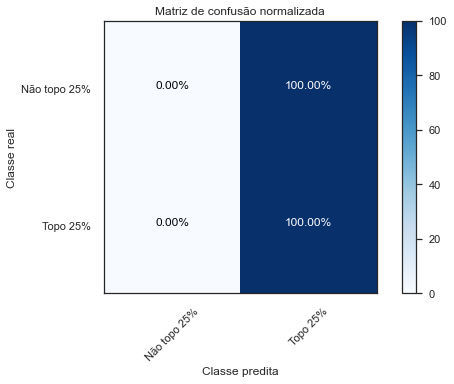

In [327]:
print_confusion_for(x_test, y_test, notas.loc['DummyClassifier']['pipe'])

# Vamos validar?

Como o algoritmo de regressão logística simples obteve resultados bons, assim como o de SVC, podemos analisar a matriz de confusão para fazer a escolha. Repare que a regressão logística apresenta maior taxa de acerto no topo 25%, portanto vamos mantê-la.

Como escolhemos uma regressão logística, não possuimos um hiperparâmetro para otimizar, e vamos direto validar o modelo que treinamos. Primeiro separaremos os dados para validação.

In [317]:
# código pronto: separando os dados não usados para treino (que foram os usados em eda)

usados_no_eda = enem_eda.index
a_usar = ~enem.index.isin(usados_no_eda)
enem_validacao = enem[a_usar]
print("Para otimização temos %d elementos" % len(enem_validacao))
del(a_usar)
del(usados_no_eda)

Para otimização temos 2562794 elementos


## Pergunta: separe os dados adequadamente de validação

- implemente a função `separa_dados_de_classificacao_para_validacao`
- X são todas as 3 colunas originais da análise
- Y é o `top_p` indicando se aquele aluno ou aluna está no top 25% baseado em sua `nota_total`
- imprima a média do conjunto Y
- retorne `X, y`

,Ciências da Natureza,Ciências Humanas,Linguagens e Códigos,Matemática,competência 1,competência 2,competência 3,competência 4,competência 5,nota_total,top_p
2090730,578.900,407.200,496.100,606.400,120.000,80.000,80.000,120.000,0.000,2488.600,1.000
3303748,422.900,476.100,447.000,461.300,120.000,160.000,120.000,120.000,120.000,2447.300,1.000
2369848,447.300,384.900,464.000,440.700,140.000,120.000,120.000,120.000,100.000,2336.900,1.000
437439,430.300,590.100,561.000,692.600,120.000,120.000,120.000,120.000,80.000,2834.000,1.000
5447897,469.700,419.600,477.400,347.200,100.000,80.000,100.000,120.000,80.000,2193.900,0.000
...,...,...,...,...,...,...,...,...,...,...,...
1584130,418.400,523.300,474.000,413.100,0.000,0.000,0.000,0.000,0.000,1828.800,0.000
3512107,441.600,559.000,451.300,334.300,80.000,120.000,80.000,80.000,120.000,2266.200,0.000
42799,614.400,595.900,601.200,806.000,160.000,120.000,140.000,180.000,140.000,3357.500,1.000
5722088,583.500,536.900,588.700,607.500,120.000,120.000,140.000,140.000,120.000,2956.600,1.000


In [319]:
def separa_dados_de_classificacao_para_validacao(dados):
    X = dados[["Linguagens e Códigos", "Matemática", "competência 3"]]
    y = top_p(dados['nota_total'], 0.75)
    print("Média da validação", y.mean())
    return X, y

## Pergunta: defina uma função de validação cruzada de um modelo de classificação

- implemente a função `treina_e_valida_modelo_de_classificacao` que recebe os dados e o modelo
- separe os dados em X e y usando `separa_dados_de_classificacao_para_validacao`
- rode um cross_val_score com o pipe, 5 folds de validação cruzada estratificada
- imprima a acurácia encontrada na validação cruzada
- faça o treinamento do modelo
- imprima a matriz de confusão do `modelo` para `X` e `y`

Dicas:
- na validação cruzada, utilize o parâmetro `verbose=1` pois o processo pode levar alguns minutos
- na validação cruzada, utilize o parâmetro `n_jobs=-1` para usar todos os processadores possíveis de seu computador

In [320]:
# solução

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import StratifiedKFold

def treina_e_valida_modelo_de_classificacao(dados, modelo):
    # calcule X e y usando a função anterior
    X, y = separa_dados_de_classificacao_para_validacao(enem_validacao)

    # calcule o cross_val_score
    cv = StratifiedKFold(n_splits=5)

    scores = cross_val_score(modelo, X, y, cv = cv, verbose = 1, n_jobs = -1)
    mean = scores.mean()
    std = scores.std()
    print("Acurácia entre [%.5f,%.5f]" % (100*mean - 2*std, 100*mean + 2*std))
    
    modelo.fit(X, y)
    print_confusion_for(X, y, modelo)

quantile encontrado 2934.8


C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Média da validação 0.25000838928138586


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.8s remaining:   19.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.1s finished


Acurácia entre [94.36338,94.37188]
Acurácia do modelo em teste 0.9437383574333326


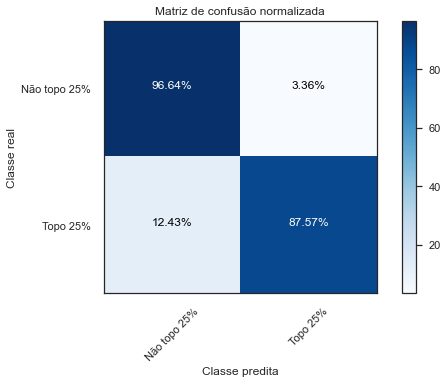

In [321]:
pipeline_logistica = make_pipeline(StandardScaler(), LogisticRegression())
treina_e_valida_modelo_de_classificacao(enem_validacao, pipeline_logistica)

## Cross validation e a matriz de confusão

Os dois resultados vão dar uma ideia do quão bom seu modelo será no mundo real.

## Lembrei de uma coisinha...

É **muito** comum no mundo real chegarmos em um resultado pior que nosso baseline. Nesses dados conseguimos um modelo razoável, mas mesmo assim também é **bem** comum, no final do processo de modelagem, lembrar de um outro tipo de modelo de base que poderíamos usar de comparação. Qual heurística simples poderia nos dizer quem vai estar nos top 25%? Repara que essa pergunta deve ser feita **antes** de se começar o projeto. Mas mesmo assim é muito comum somente próximo ao fim do projeto, agora entendendo melhor nosso conjunto de dados, chegar a ideias de heurísticas simples e poderosas que poderiam ser melhores que um modelo complexo. Infelizmente isso também pode acontecer com uma frequencia razoável. Temos que entender que faz parte: testamos heurísticas antes (como o DummyClassifier) e em qualquer momento que vierem a cabeça.

Vamos então testar uma delas?

Se soment sabemos as 3 notas de um aluno ou aluna, será que quem está no top 25% dessas 3 notas serão as pessoas que estarão no top 25% de todas as notas? Parece ser algo razoável de se imaginar como verdadeiro. Vamos então criar o **nosso estimador**! É normal "suar frio" nesse instante, será que a heurística - que parece fazer sentido - será melhor que o modelo?

## Pergunta: Implementando nosso estimador

Vamos implementar uma classe com diversas funções que todos os estimadores devem possuir. Ao treinar nosso estimador ele olha todos os alunos de treino e calcula a nota que separa o top 25%. Ao validar ele usa essa nota: se o aluno ou aluna tem uma nota maior que a nota de corte, é top 25% (1), caso contrário não é (0).

- Implemente a função `fit`. Ela recebe em X as 3 colunas que desejamos somar e deve calcular qual é o quantil de top 25%
- Implemente a função `predict`. Ela recebe X com as 3 colunas, calcula a soma delas e verifica quem está acima do quantil. Quem está acima é classificada como 1, quem está abaixo como 0
- Implemente a função `score`. Ela calcula a acurácia usando a função `accuracy_score` e as predições que o próprio estimador fez
- A função `get_params` não devolve nada uma vez que nosso estimador não possue paramêtros a serem otimizados

In [325]:
# solução: implemente o código que falta

from sklearn.metrics import accuracy_score

class HeuristicaTop25:

    def fit(self, X, y = None):
        if(X.shape[1] != 3):
            print("Erro!!! Estávamos esperando 3 colunas!")
            
        parcial = X.sum(axis = 1) # some **por coluna**. a função sum recebe um parâmetro para somar por coluna, não linha
        self.top_25_quantile = pd.Series(parcial).quantile(0.75)
        print("top 25 quantile é %.2f" % self.top_25_quantile)
        return self

    def predict(self, X, y = None):
        parcial = X.sum(axis = 1) # some por coluna
        # compare a soma parcial com o self.top25_quantile
        y_pred = []
        for e in parcial:
            if e > self.top_25_quantile:
                y_pred.append(1)
            else:
                y_pred.append(0)
        y_pred = pd.Series(y_pred)
        return y_pred # 1 se for maior ou igual, 0 caso contrário


    def score(self, X, y = None):
        return accuracy_score(y, self.predict(X, y))

    def get_params(self, deep=True):
        return {}

quantile encontrado 1.0


C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Média da validação 0.25000838928138586


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s finished


Acurácia entre [92.77976,92.78904]
top 25 quantile é 1293.00
Acurácia do modelo em teste 0.9279415356833206


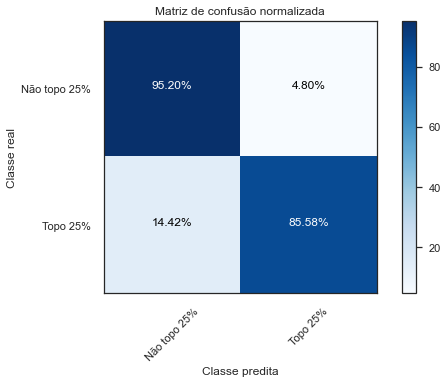

In [326]:

treina_e_valida_modelo_de_classificacao(enem_validacao, HeuristicaTop25())


## Pergunta: Compare os resultados  da acurácia e da matriz de confusão entre (a) heurística final com (b) o DummyClassifier e (c) a LogisticRegression

### Solução

* Resultado DummyClassifier 0.7543453070683661
* Resultado LogisticRegression 0.9227500965623793

Como pode ser visto, a LogisticRegression teve uma acurácia melhor que a DummyClassifier, logicamente isso reflete na matriz de confusão, gerando maior número de predições com erro. Analizando a matriz de correlação, percebe-se que o DummyClassifier mascou todas as predições como 1, invalidando este modelo.

## Pergunta: Sugira uma outra heurística que poderia ser usada para tentar detectar facilmente o top 25%, sem a necessidade de um modelo complexo

### Solução

    Pode somar as notas do aluno e ver se alcança o top 25%.

## Pergunta: Se uma faculdade oferecer bolsa somente para quem o modelo julgar estar no top 25% o que acontece quando ele julga errôneamente que alguém não está no top 25%? E se julgar errôneamente que está no top 25%?

### Solução

    o que acontece quando ele julga errôneamente que alguém não está no top 25%?
    o modelo não dará a bolsa para alguém que deveria ganhar a bolsa.
    
    E se julgar errôneamente que está no top 25%?
    o modelo dará a bolsa para alguém que não deveria ganhar a bolsa.

## Para saber mais

Essa seção serve para instigar sua curiosidade em possíveis caminhos que queira ler e se aprofundar, todos ligados ao projeto atual. Nenhum deles é obrigatório para o projeto em si.

### TRI 

Na prática a prova do Enem já usa métodos estatísticos para entender as dificuldades de suas questões e balanceá-las de diversas maneiras. A Teoria de Resposta ao Item (IRT em inglês) é uma das abordagens usadas para analisar e adaptar questões e provas. No Brasil diversas empresas e startups usam a tecnologia para entender as dificuldades e facilidades que pessoas possuem, com o objetivo de otimizar o estudo das mesmas.

### E no ano seguinte?

Devido ao TRI podemos esperar uma certa uniformidade entre provas aplicadas em anos diferentes. Mas fica a questão: estamos treinando agora nosso modelo com X% dos alunos que fizeram a prova em um ano X, portanto precisaríamos que X% dos alunos fizessem a prova completa para termos um modelo capaz de julgar somente a partir das provas parciais: não removemos a necessidade de criação da prova. Imaginando que grande parte do custo está na distribuição e correção manual da redação, existe muita margem para otimização.

Uma outra abordagem seria treinar o modelo nos dados de um ano anterior a X e ver se o modelo se comporta bem para todos os anos posteriores. Repare como a definição do processo de separação dos dados de treino (por %? por ano?) e de validação faz muita diferença em entender como podemos usar o modelo no mundo real.

### 25%?

Nossa heurística envolveu usar o top 25%, mas poderíamos testar com os top 30% das notas parciais se seriam os top 25% das notas totais. Estaríamos errando mais para um lado do que para o outro, e isso pode ser aceitável por nosso cliente. Poderíamos continuar com a modelagem, criando um hiper parâmetro em nosso modelo e tentando otimizá-lo, por exemplo, a medida que conversamos com a empresa cliente

### Redes neurais

Neste projeto não usamos redes neurais (TensorFlow, Keras, Pytorch etc) mas é outro tipo de classificador, assim como AdaBoost e outros que poderiam ser utilizados. Como o conjunto de dados é bem grande e o relacionamento entre as notas é linear (sabemos que a nota total é a soma das notas parciais, mas não sabemos a relação entre as notas que não usamos), os modelos mais simples foram capazes de pegar boa parte do padrão encontrando nos resultados finais.


### Classes balanceadas

Se usamos 75% e 25% existe um desbalanceamento das classes e isso bagunça nossas métricas e análises. O mesmo ocorreria com 3 ou mais classes distintas. Existem diversas abordagens para tentar corrigir isso. Uma delas é simplesmente remover parte dos dados da classe que está aparecendo "demais". Isto é, dos 75%, joga uma parte aleatória fora (ou usa outros métodos para criar/remover samples). O código a seguir é um exemplo de como balancear através de jogar fora dados aleatoriamente. Dado os dados já com a coluna `top_p` ele vai balancear para 50% 50% as classes:

```
from imblearn.under_sampling import RandomUnderSampler

def random_under_sampler(dados):
    X = dados.drop('top_p', axis=1)
    y = dados['top_p']
    X_under, y_under = RandomUnderSampler(random_state=0).fit_resample(X, y)
    X_under = pd.DataFrame(X_under, columns=X.columns)
    X_under['top_p'] = y_under
    return X_under
```

Teríamos que levar em consideração que o DummyClassifier passaria a acertar agora somente 50% dos casos, pois as duas classes aparecem proporcionalmente.

# Parabéns, você concluiu o projeto da Alura!

## Obrigado, exercício desafiador!!!